The problem statement is as follows:
    
How can we leverage agricultural data to analyze and address variations in crop yields, identify key factors influencing 
harvest outcomes, and determine optimal planning times for farmers

In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns

In [16]:
df=pd.read_csv('Crop_Recommendation.csv', encoding='unicode_escape')

Data fields


N - ratio of Nitrogen content in soil

P - ratio of Phosphorous content in soil

K - ratio of Potassium content in soil

temperature - temperature in degree Celsius

humidity - relative humidity in %

ph - ph value of the soil

rainfall - rainfall in mm

DATA CLEANING

In [7]:
df.shape

(2200, 8)

In [9]:
df.head()

N   P   K  Temperature   Humidity        ph    Rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
pd.isnull(df).sum()

N              0
P              0
K              0
Temperature    0
Humidity       0
ph             0
Rainfall       0
label          0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [14]:
df.shape

(2200, 8)

In [15]:
df.describe()

N            P            K  Temperature     Humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     Rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

DATA VISUALISATION

In [17]:
df.columns

Index(['N', 'P', 'K', 'Temperature', 'Humidity', 'ph', 'Rainfall', 'label'], dtype='object')

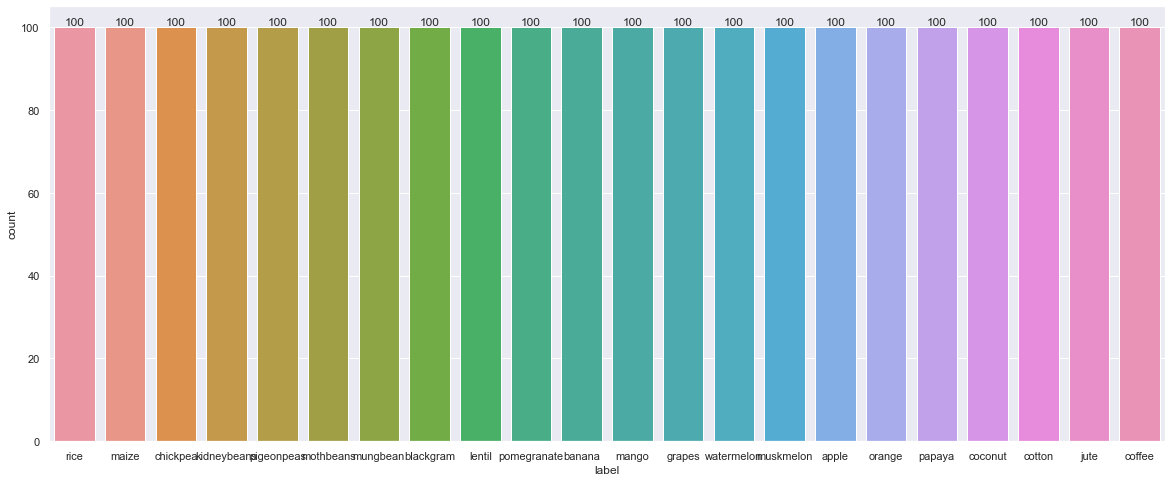

In [20]:
ax = sns.countplot(x = 'label',data = df)
sns.set(rc={'figure.figsize':(15,5)})
for bars in ax.containers:
    ax.bar_label(bars)

Insight-- there are a 100 data samples of each of the 22 different types of crops

In [41]:
df.columns

Index(['N', 'P', 'K', 'Temperature', 'Humidity', 'ph', 'Rainfall', 'label'], dtype='object')

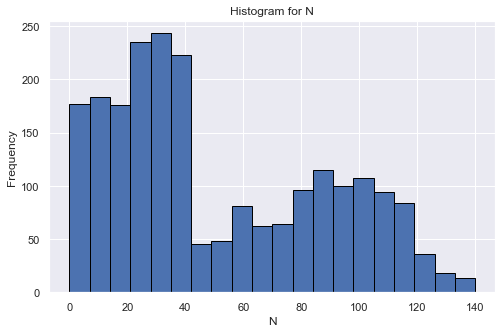

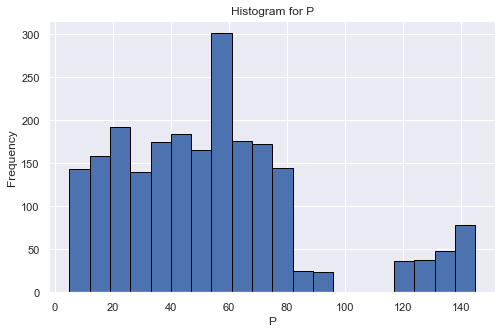

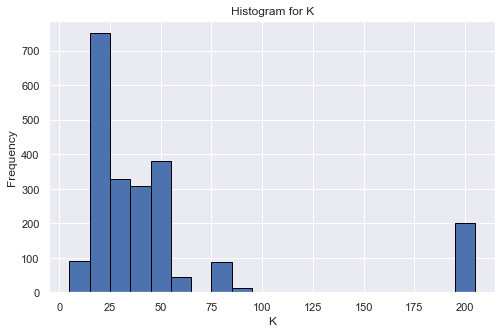

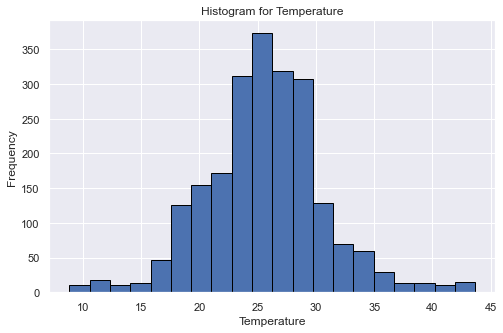

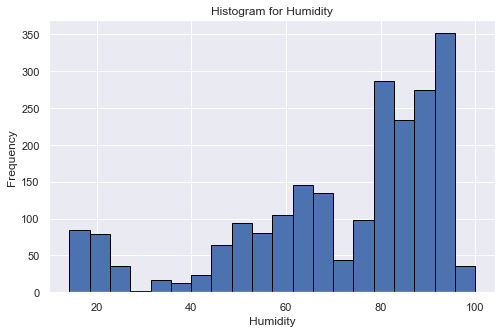

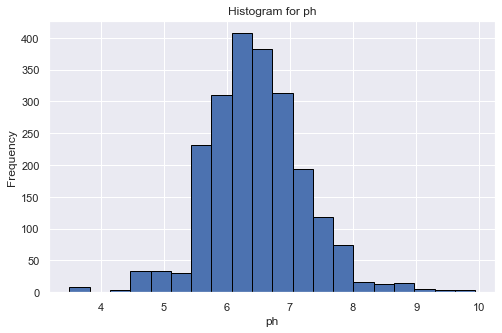

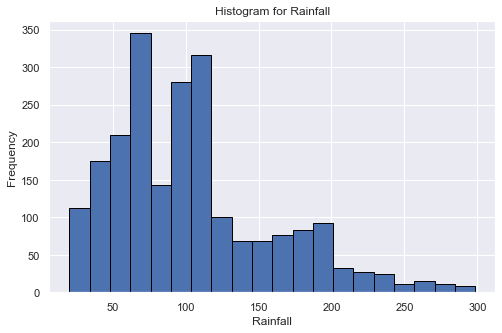

In [47]:
columns_to_plot = ['N', 'P', 'K', 'Temperature', 'Humidity', 'ph', 'Rainfall']
for column in columns_to_plot:
    plot.figure(figsize=(8, 5))
    plot.hist(df[column], bins=20, edgecolor='black')
    plot.xlabel(column)
    plot.ylabel('Frequency')
    plot.title(f'Histogram for {column}')
    plot.show()

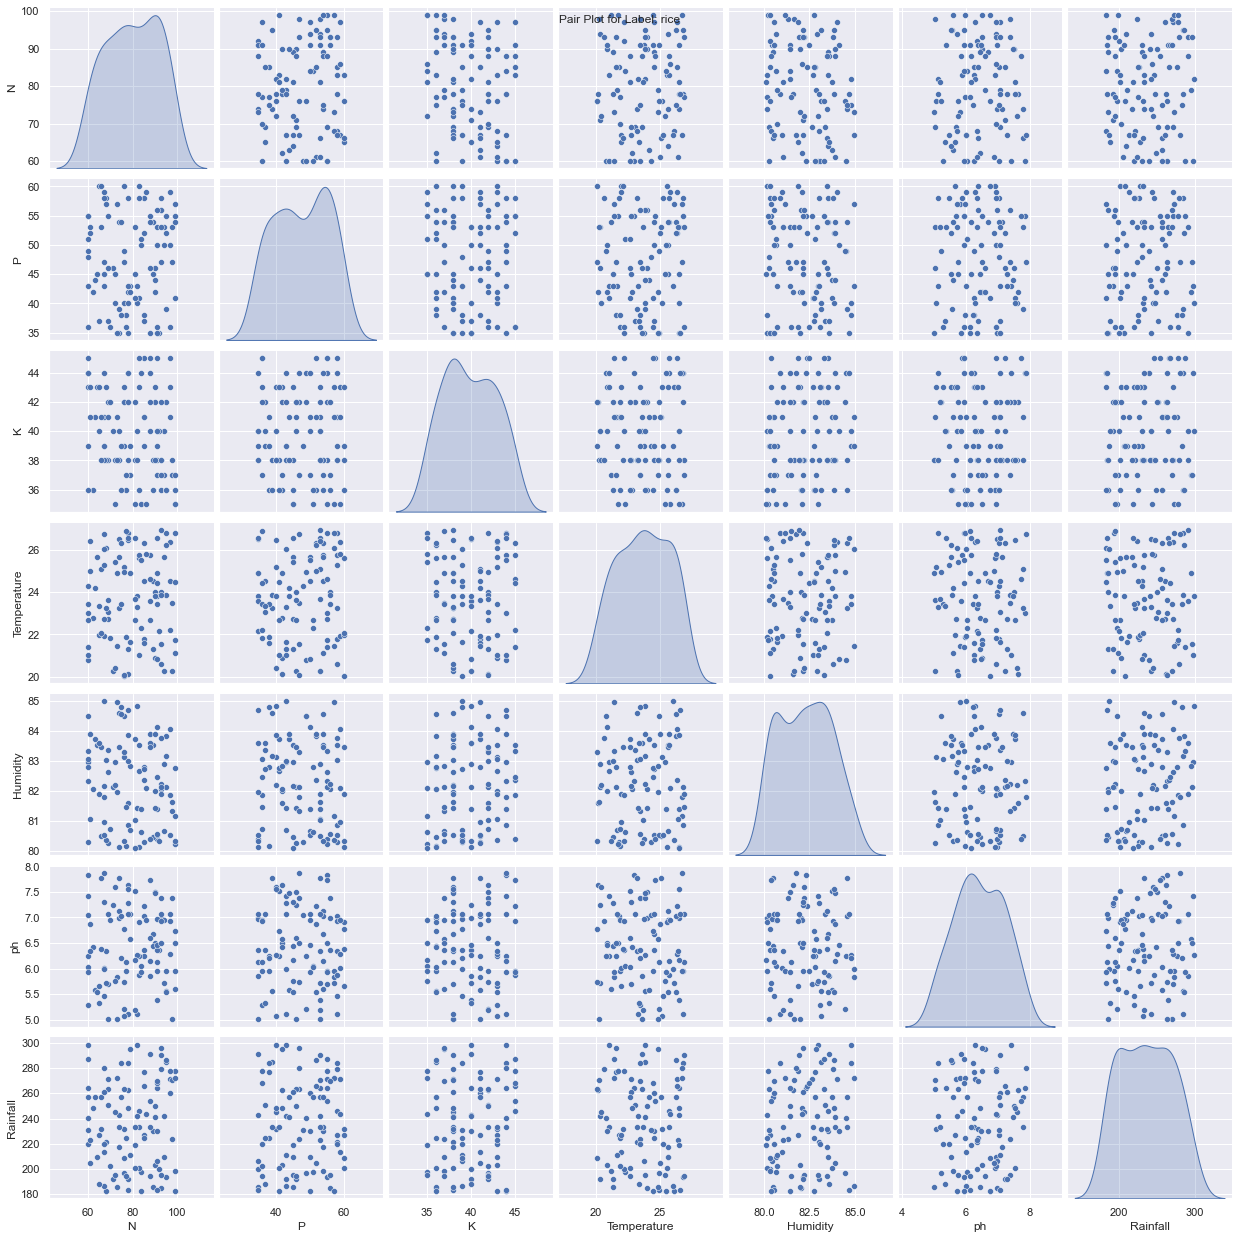

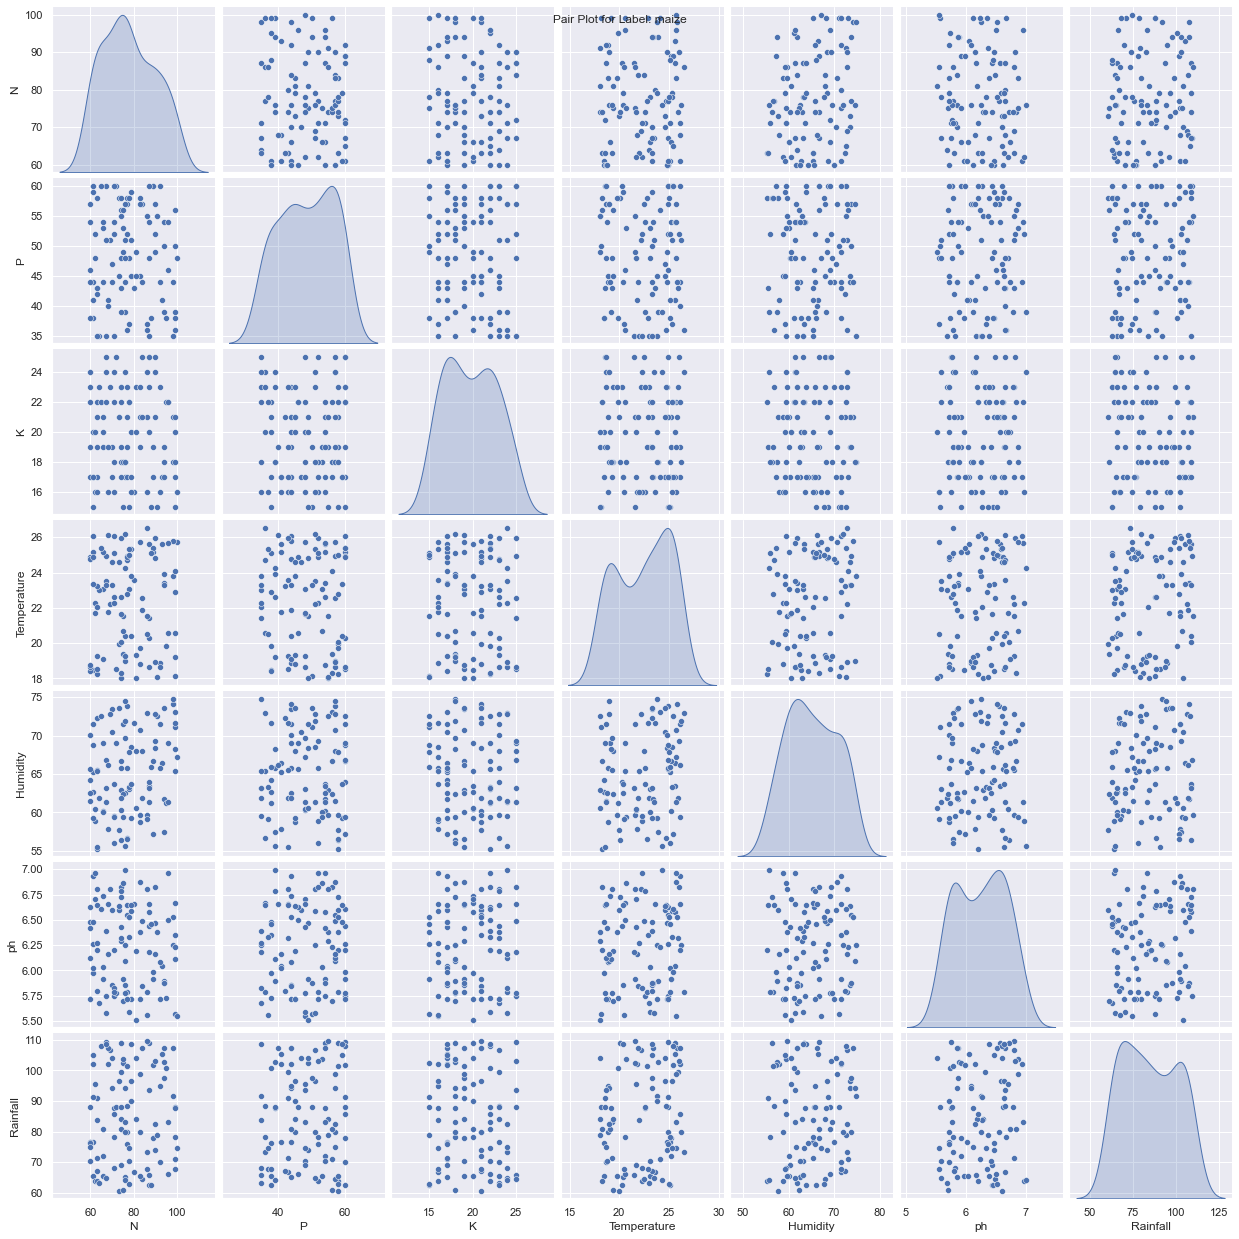

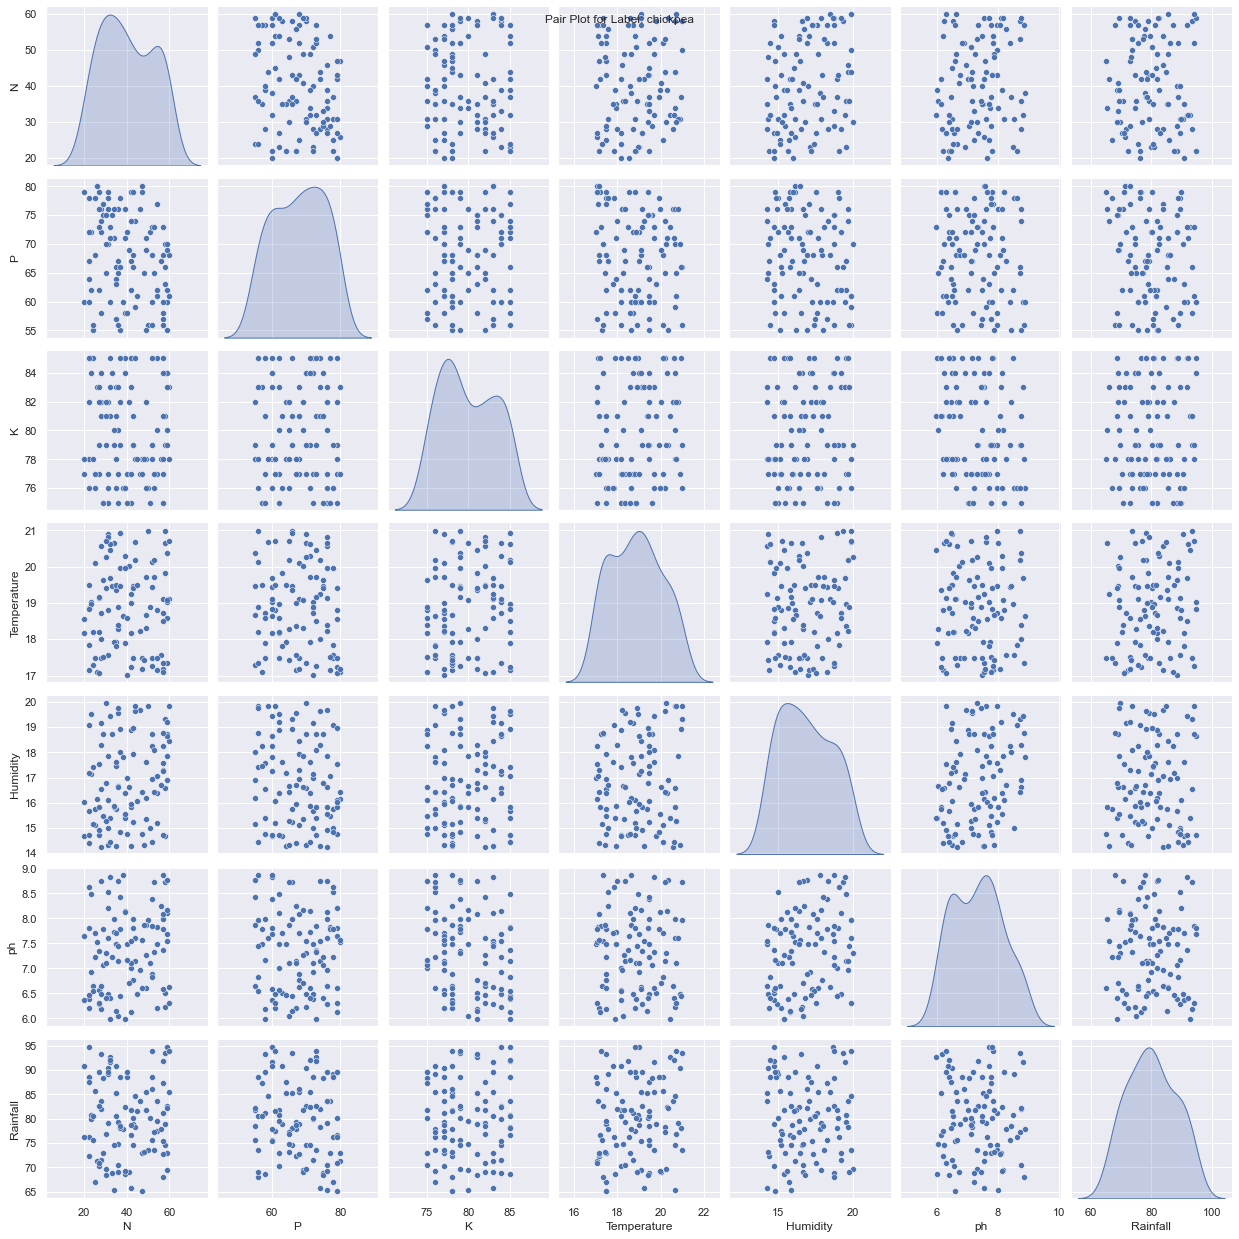

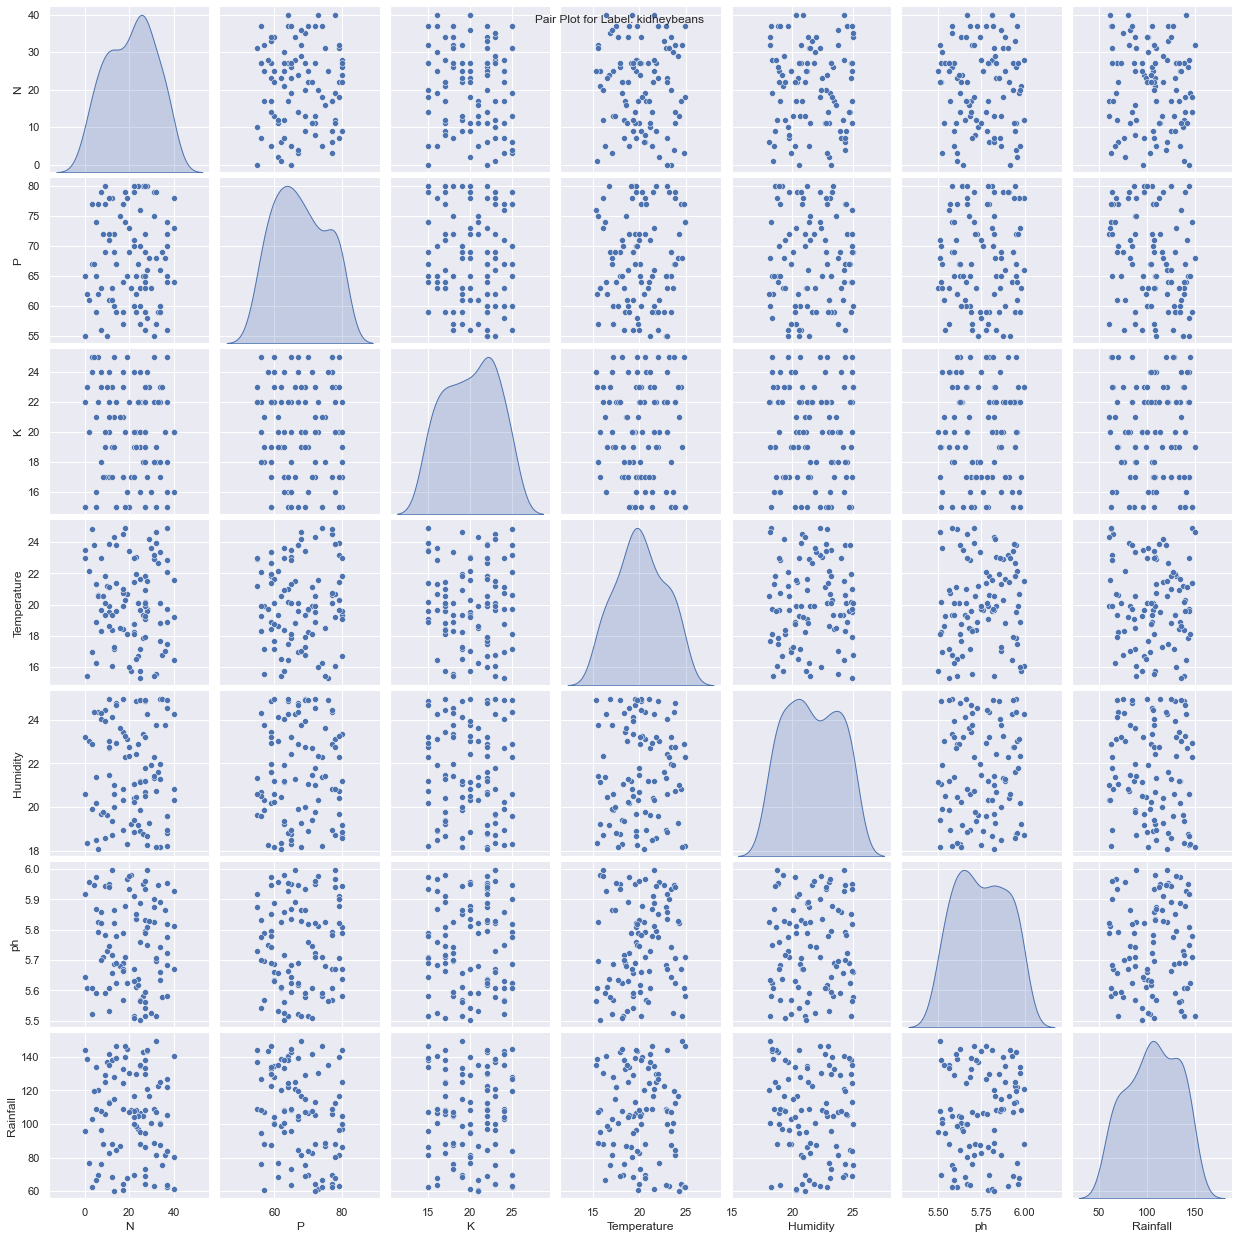

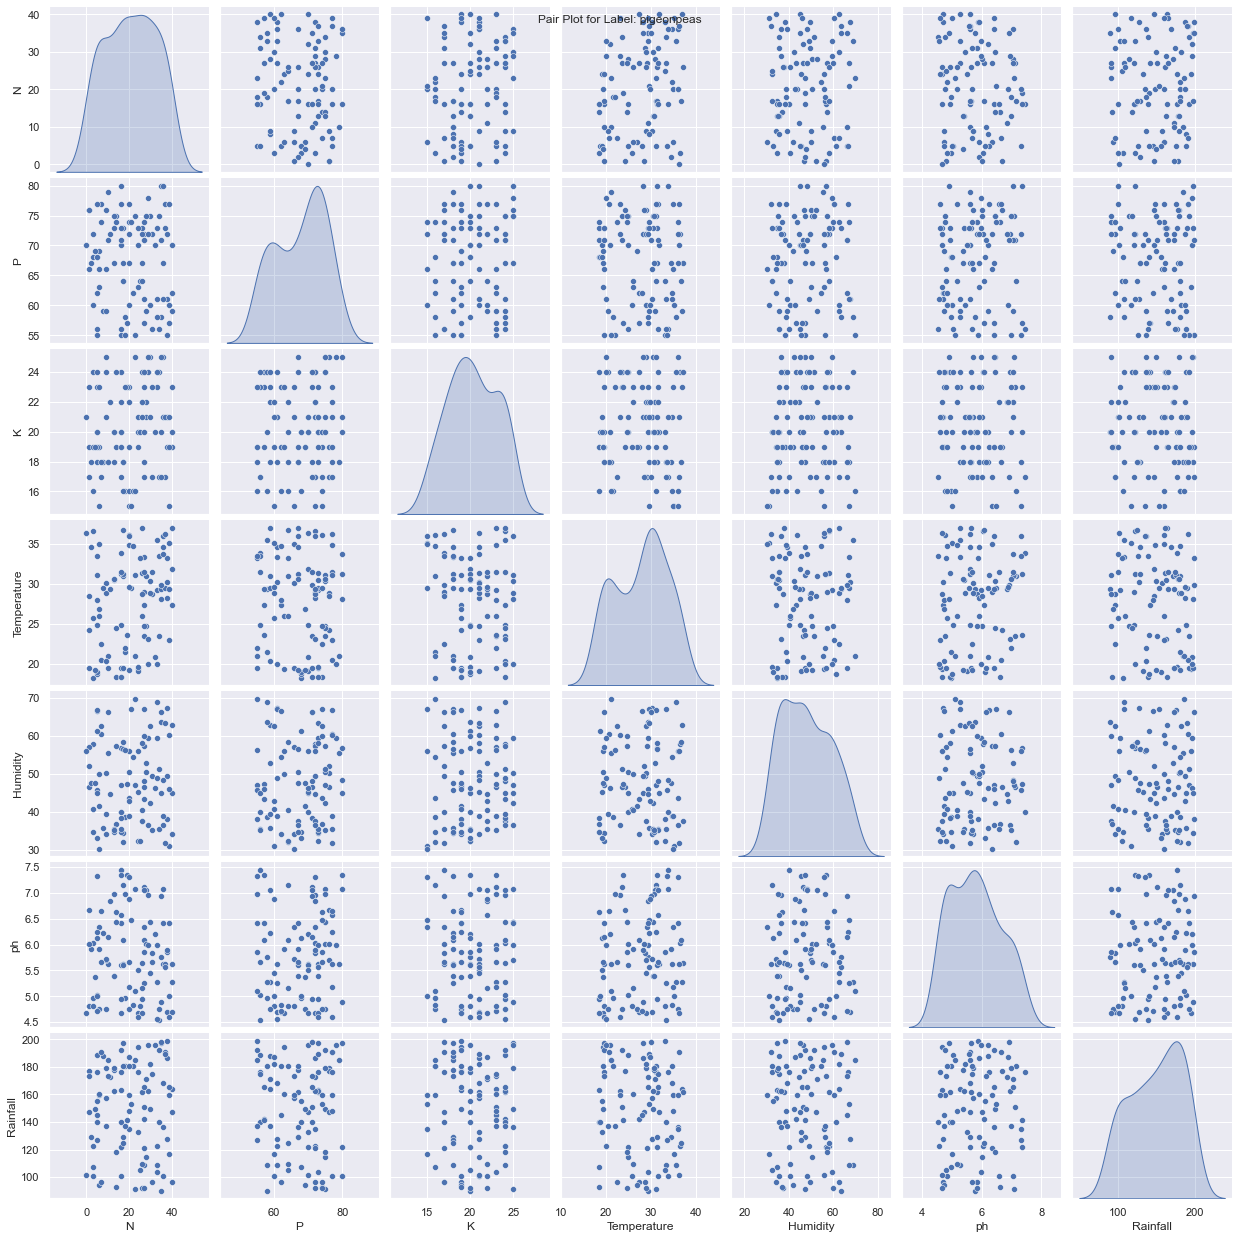

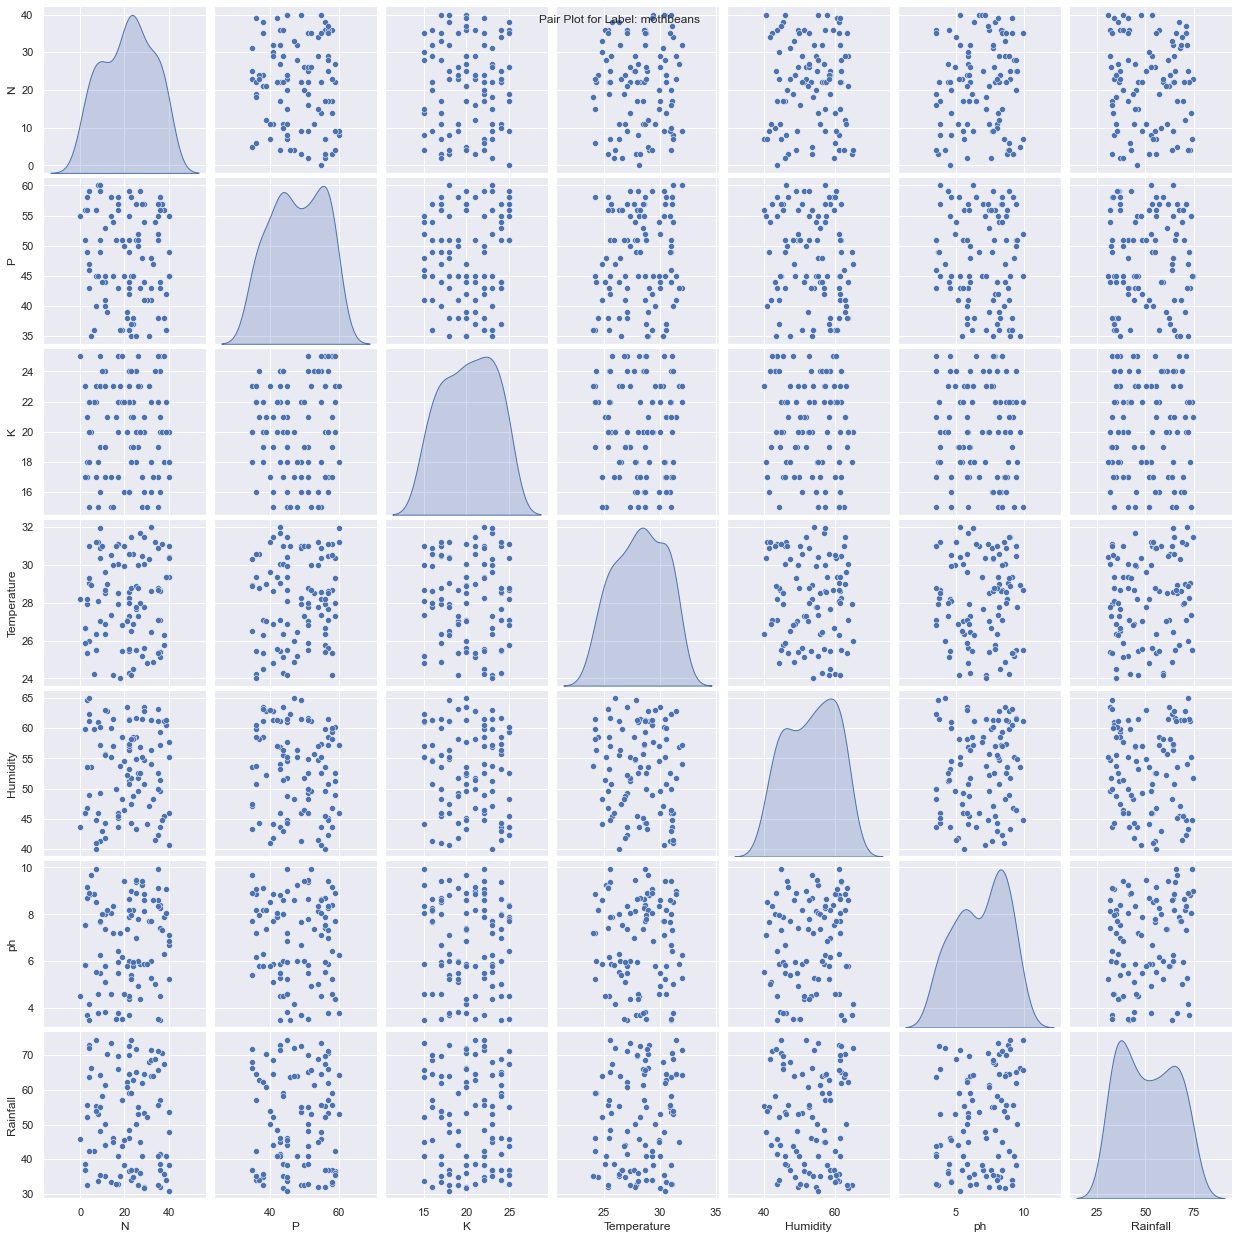

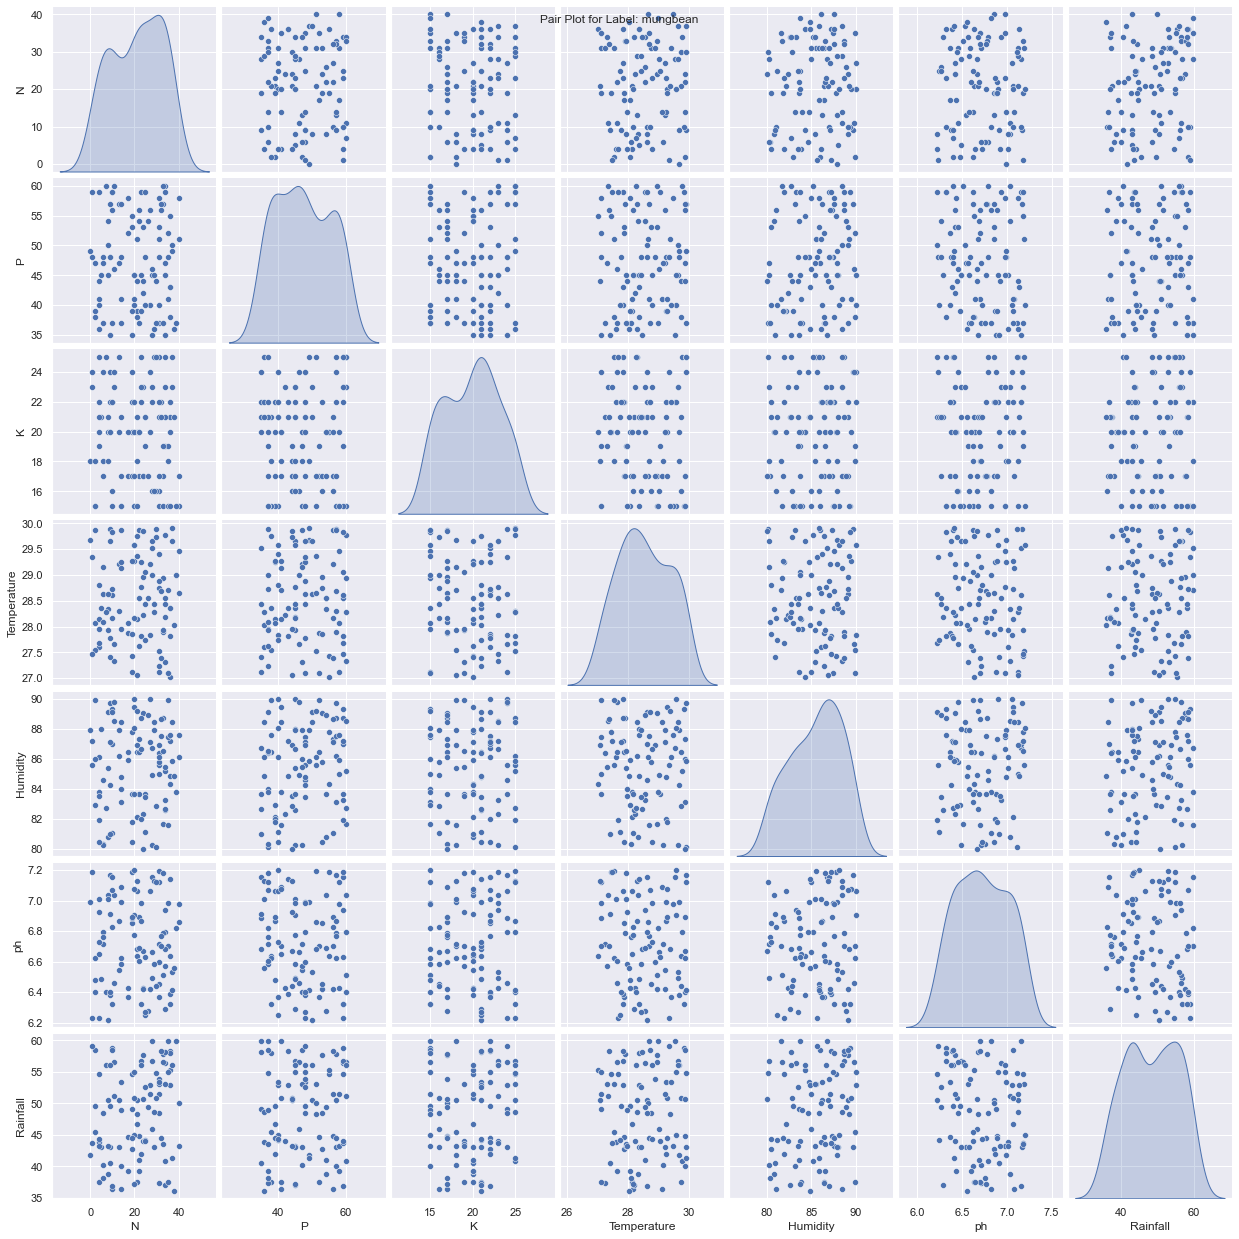

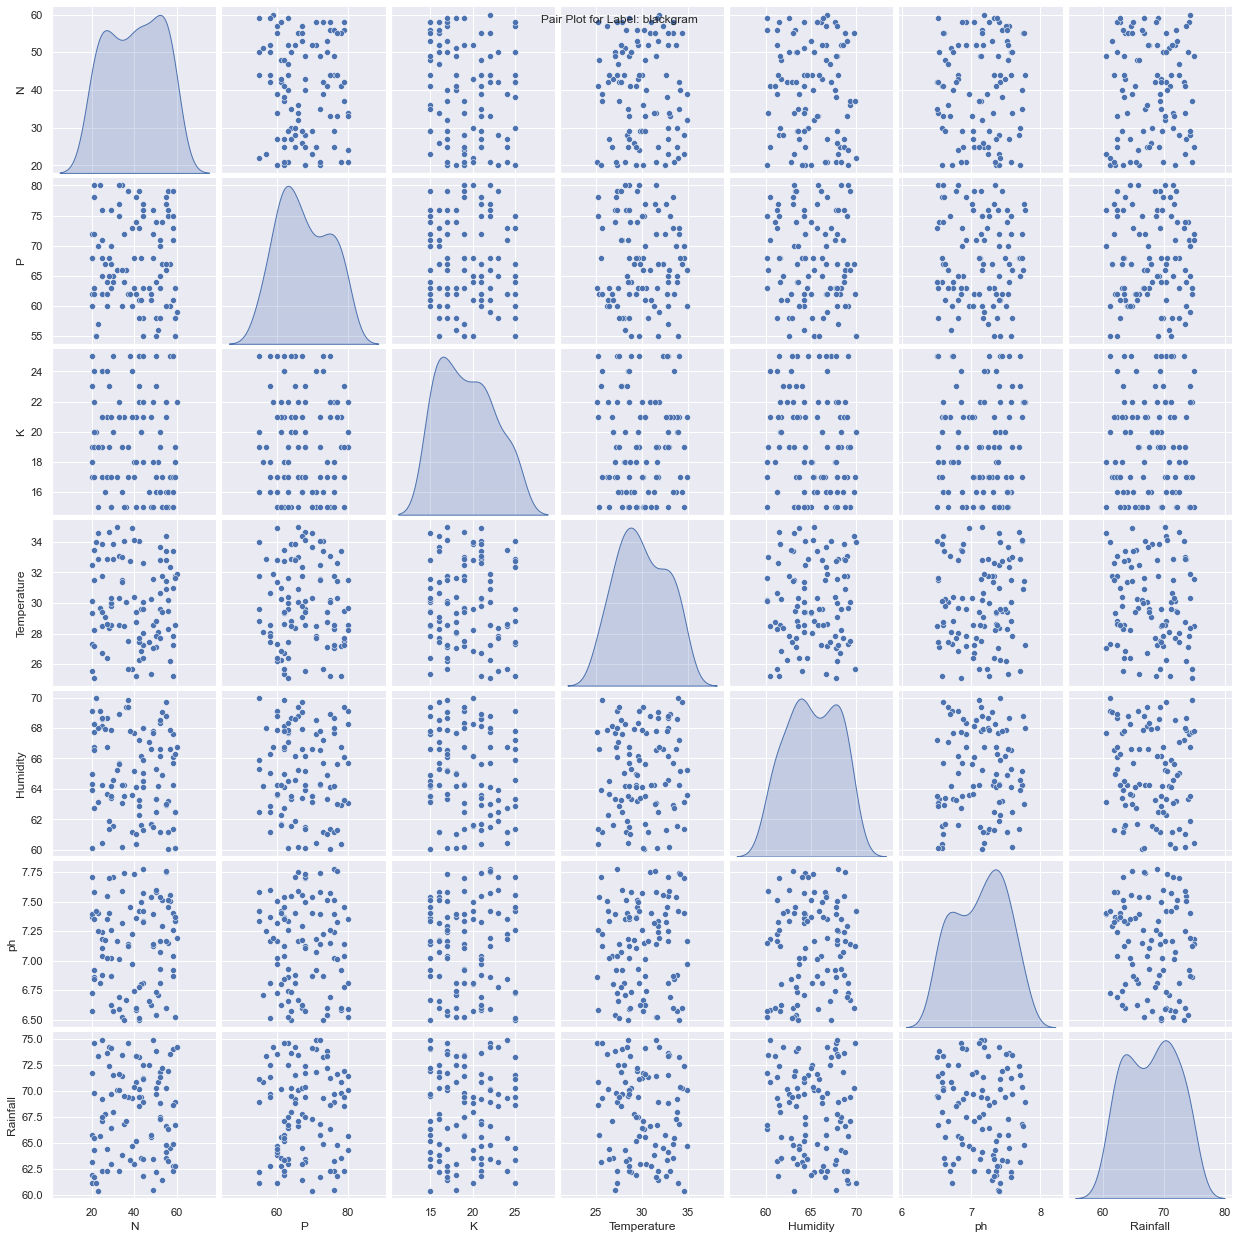

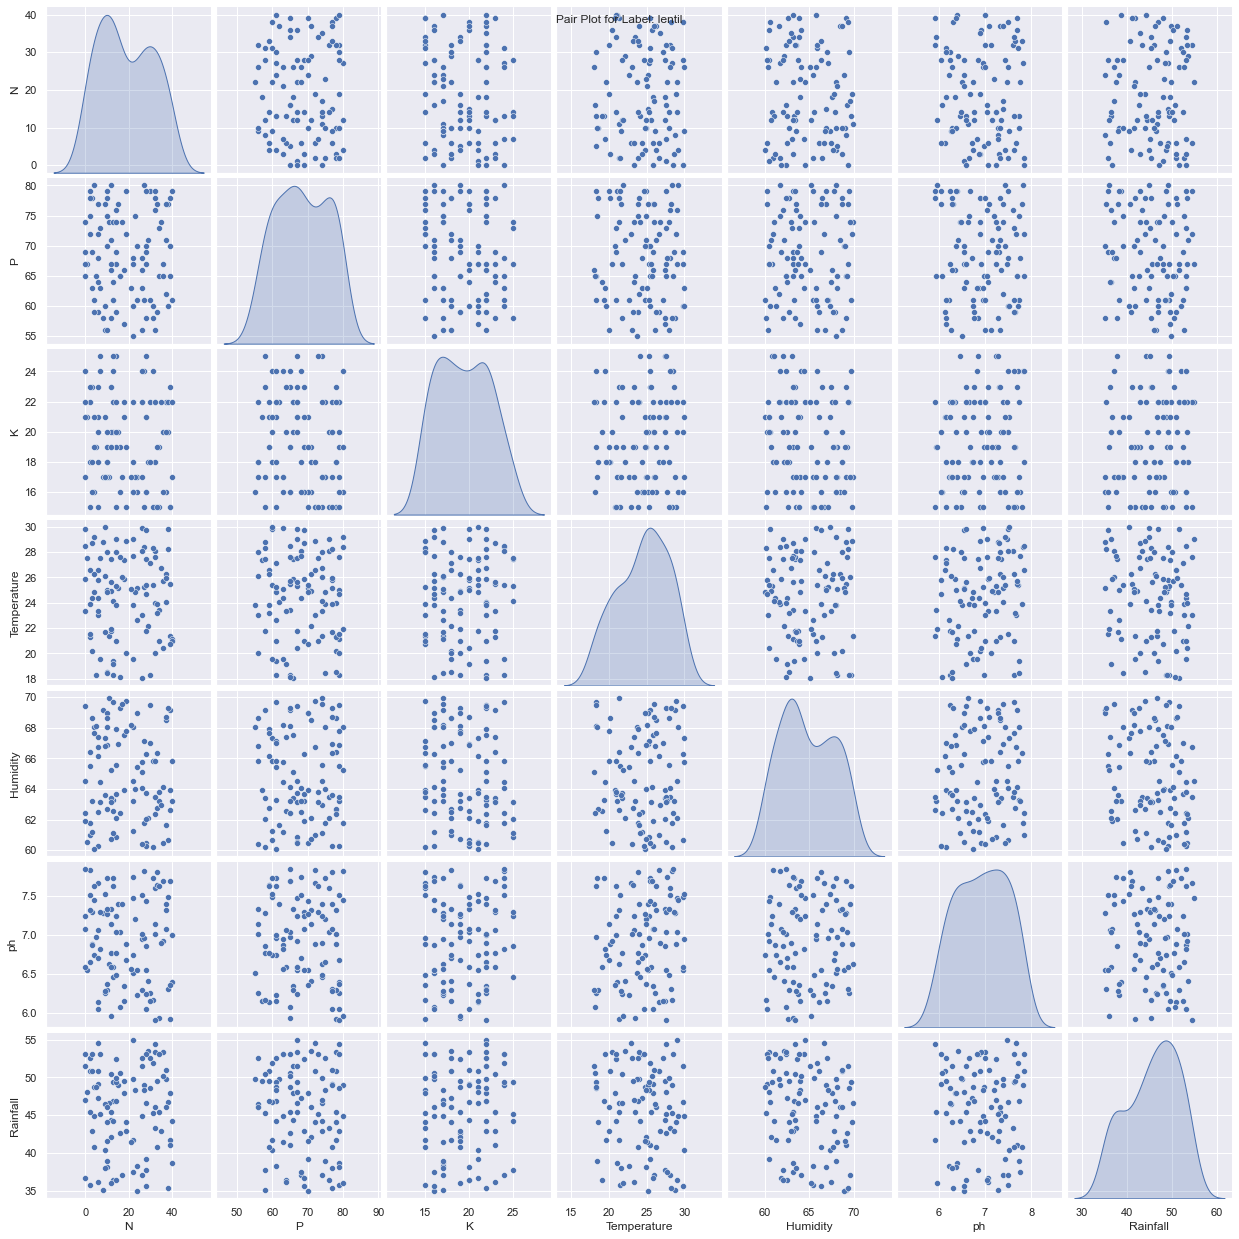

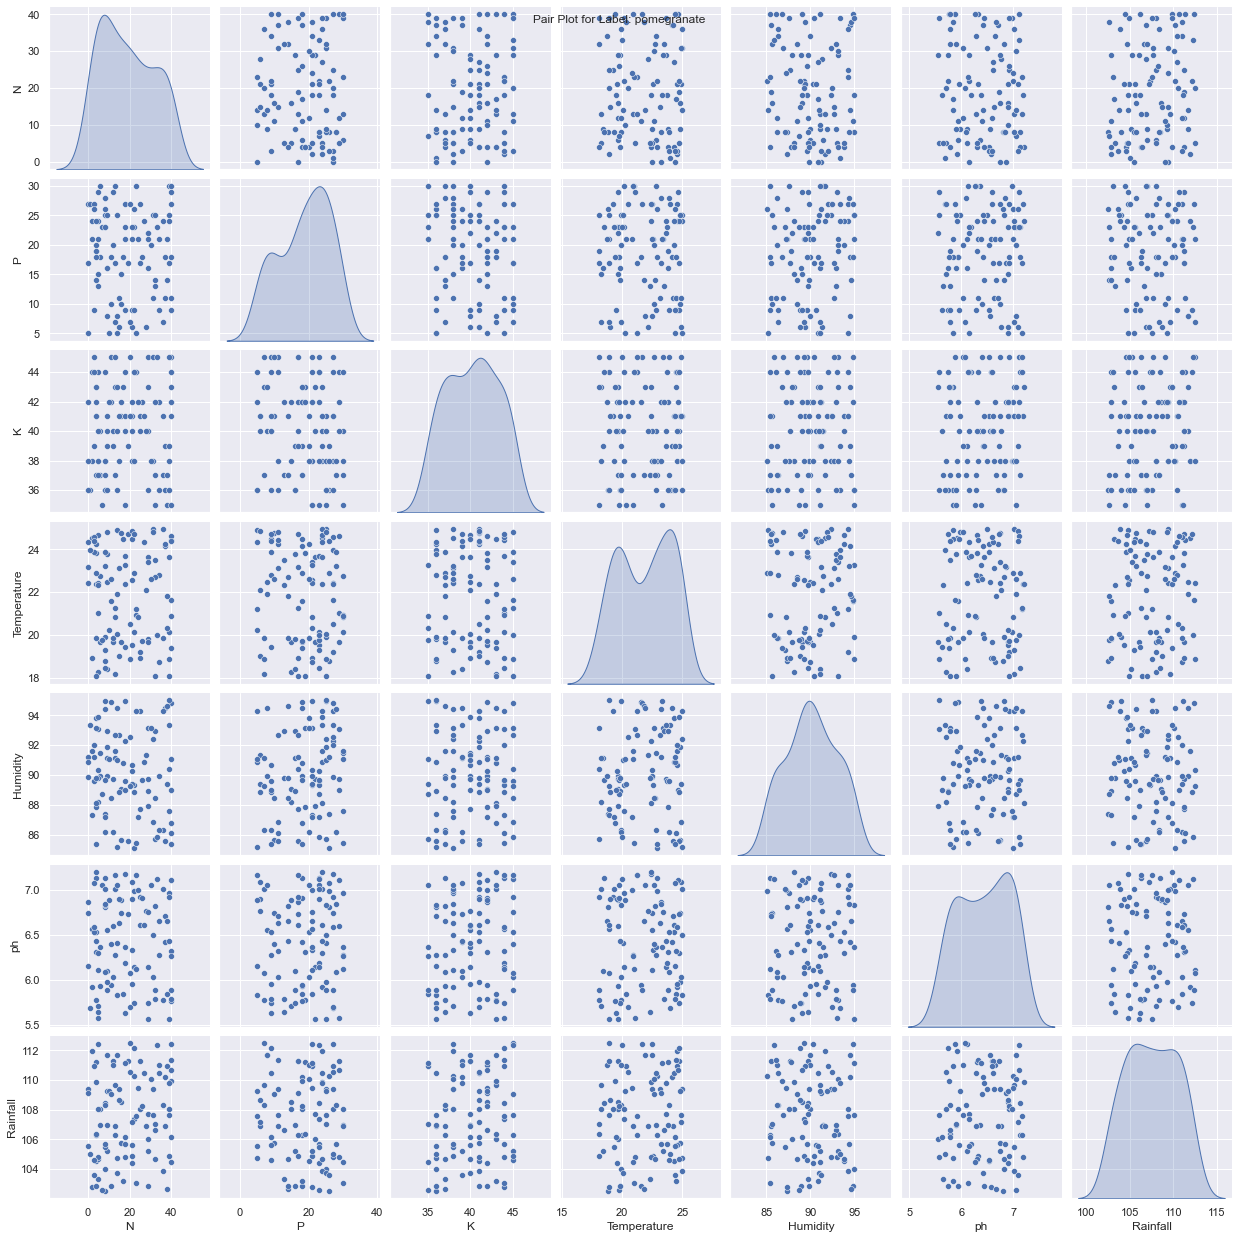

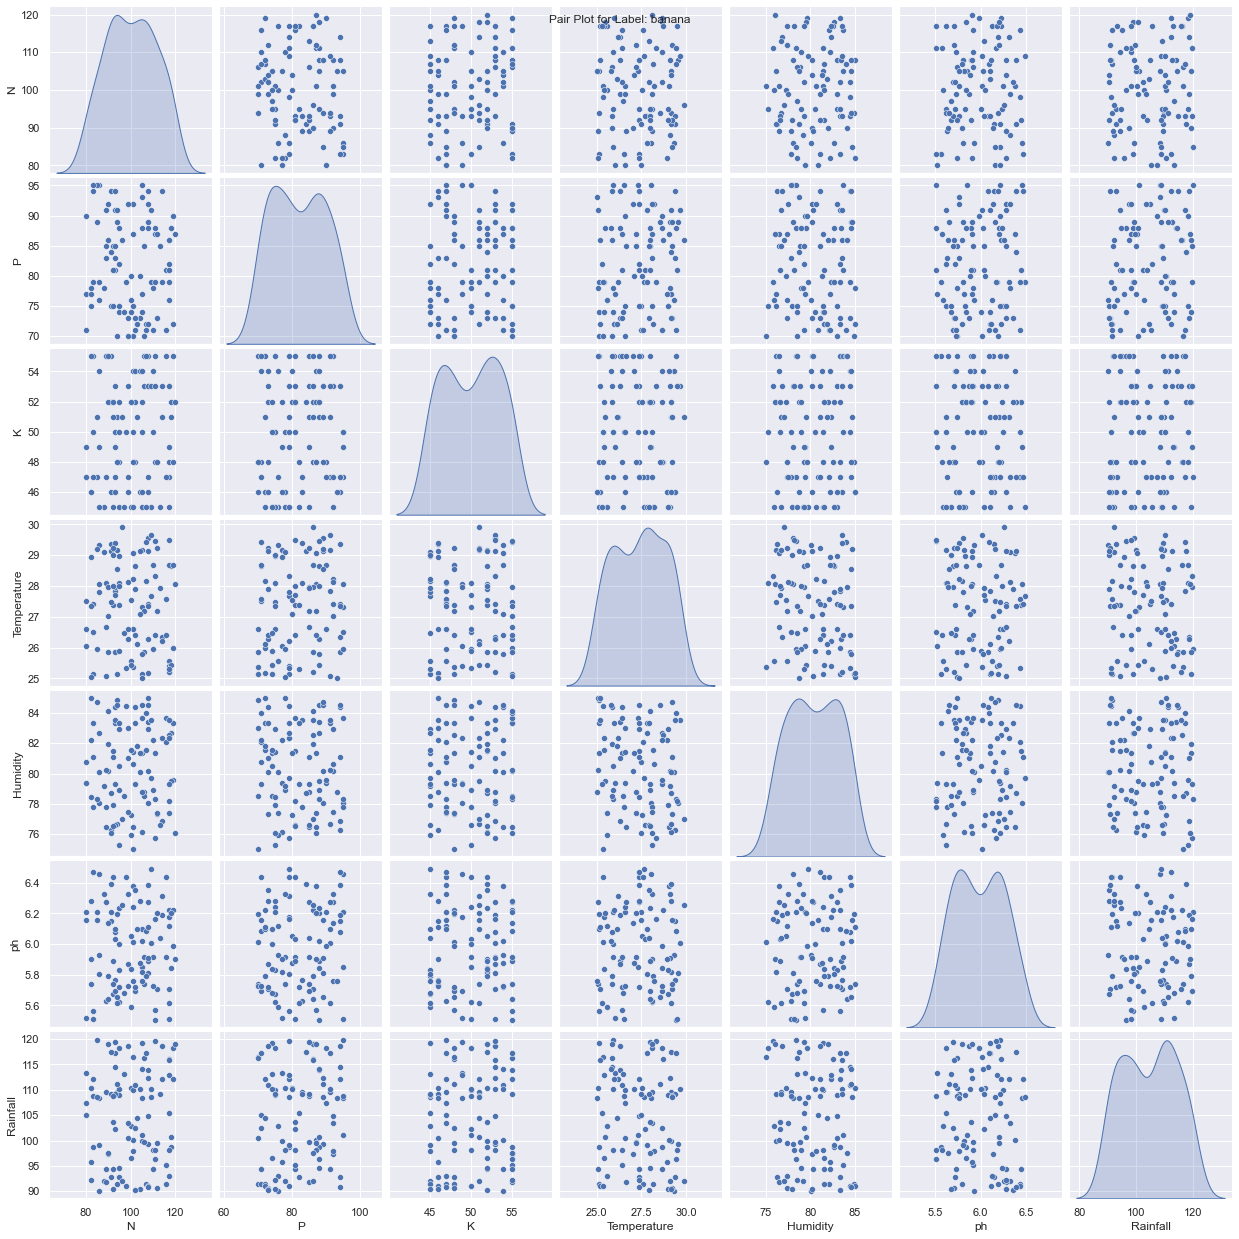

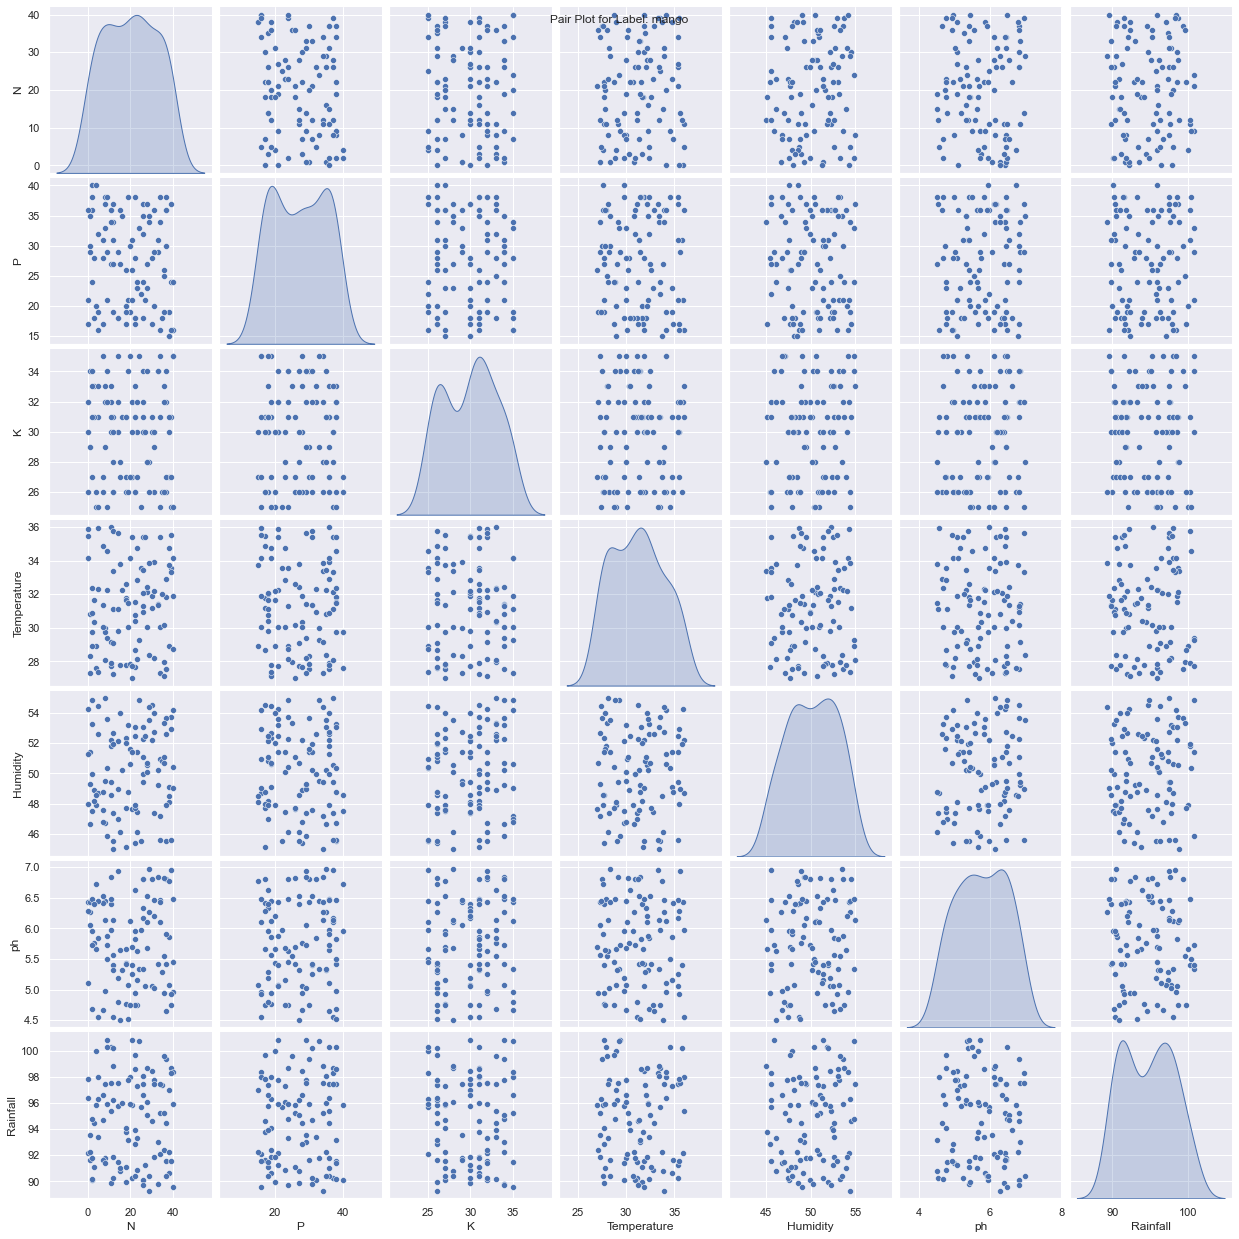

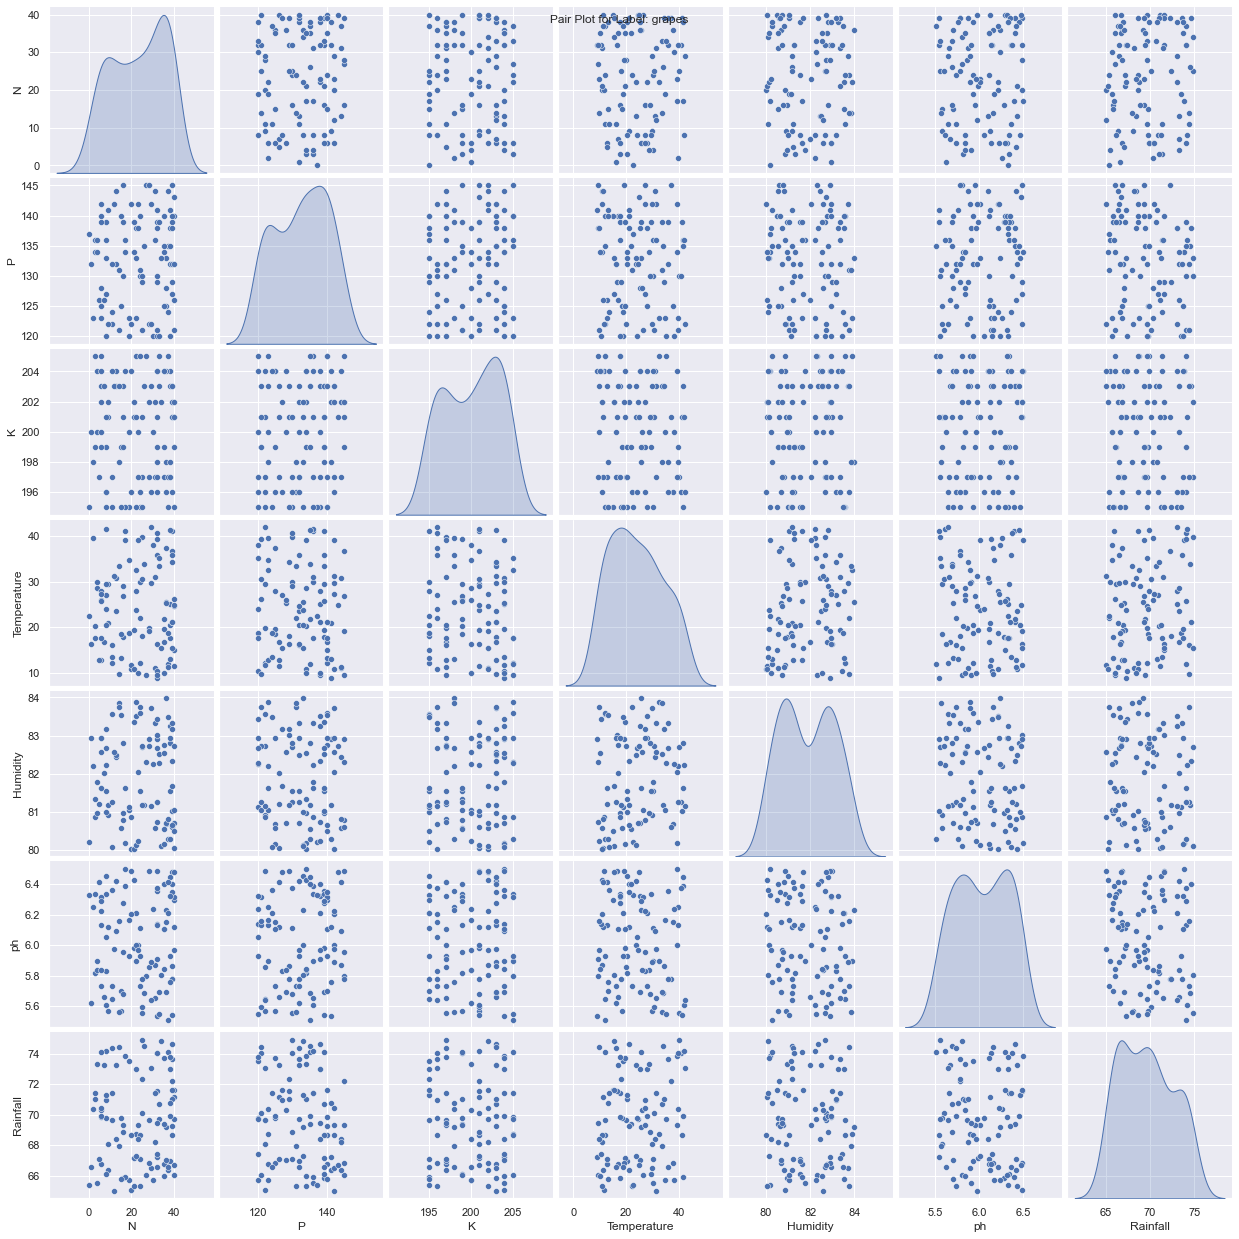

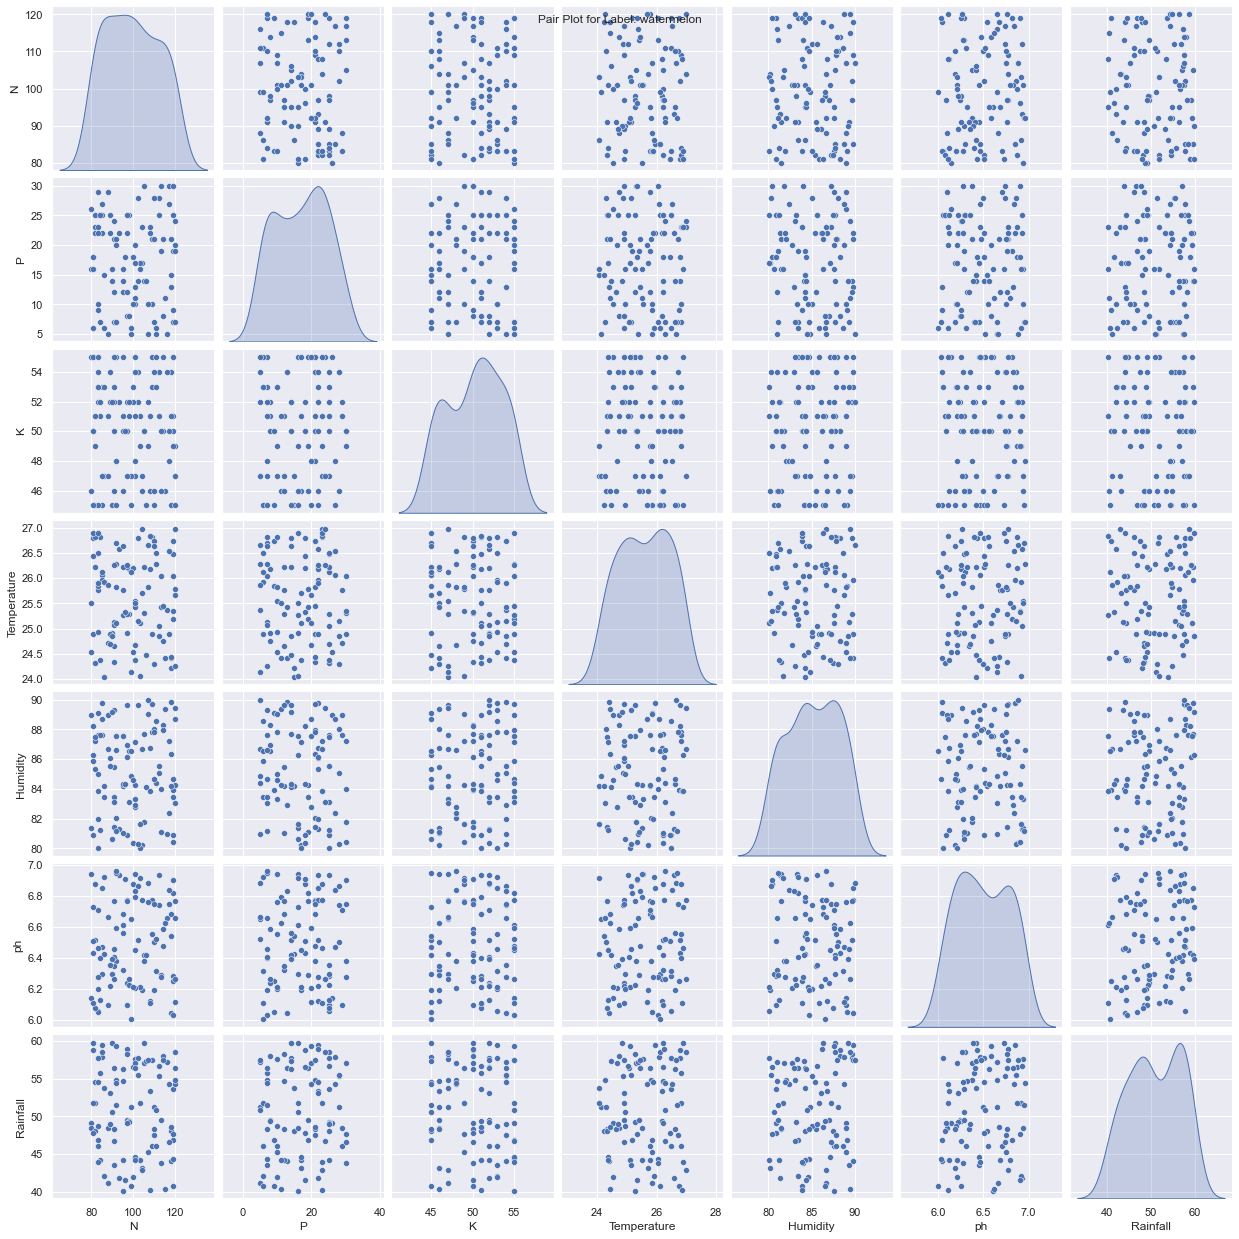

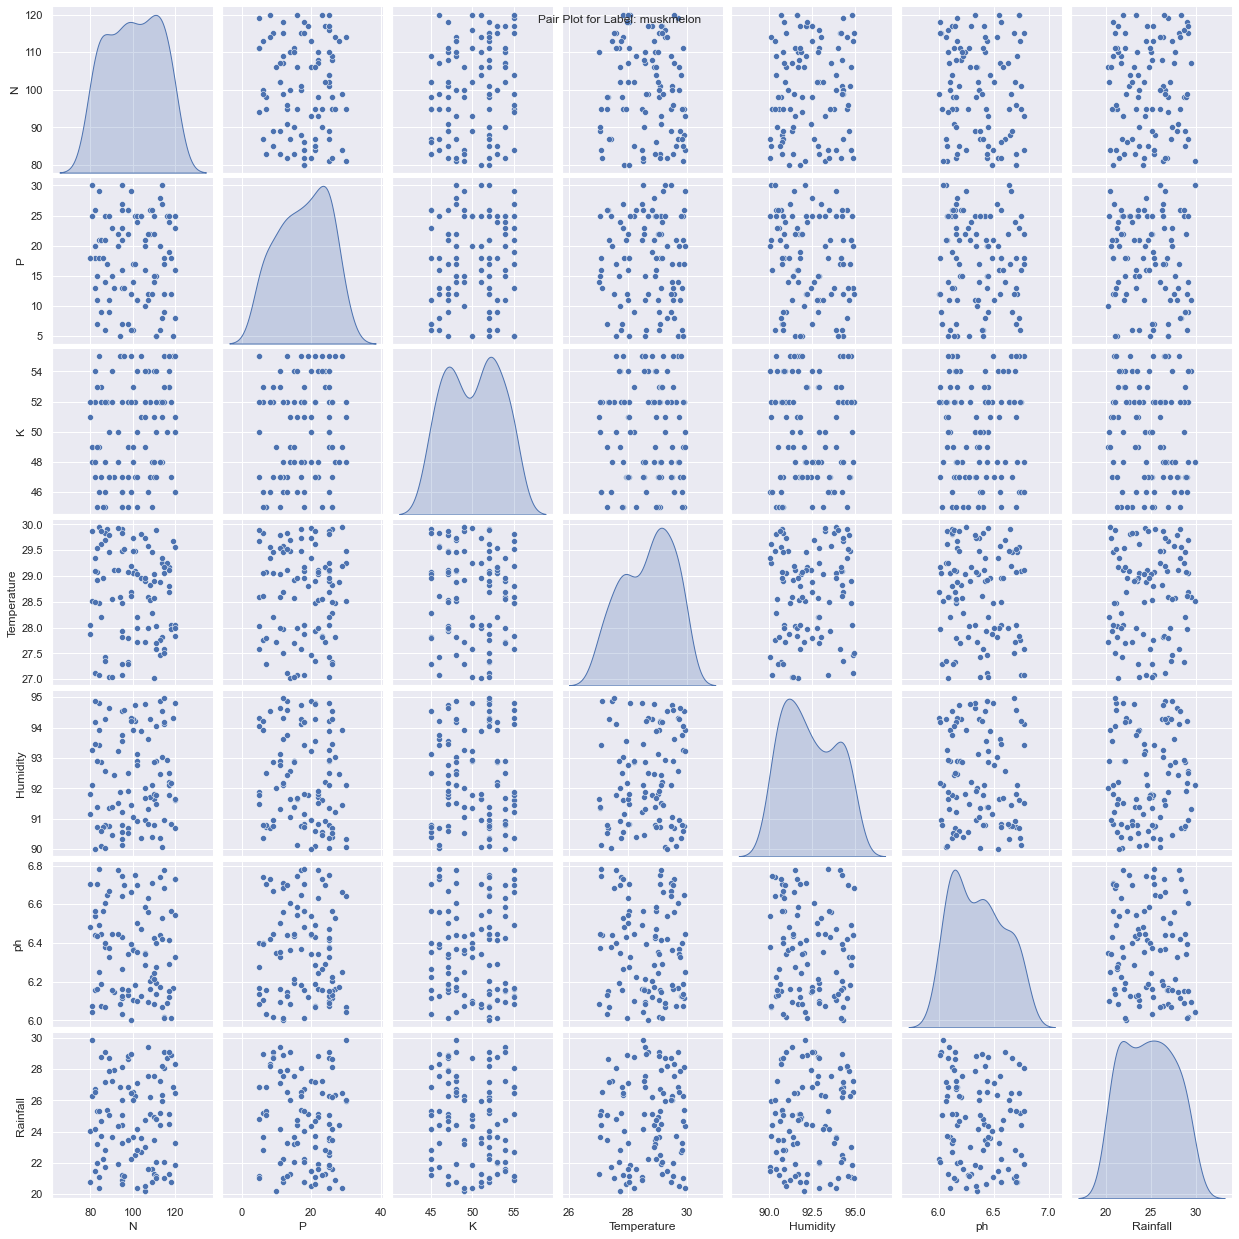

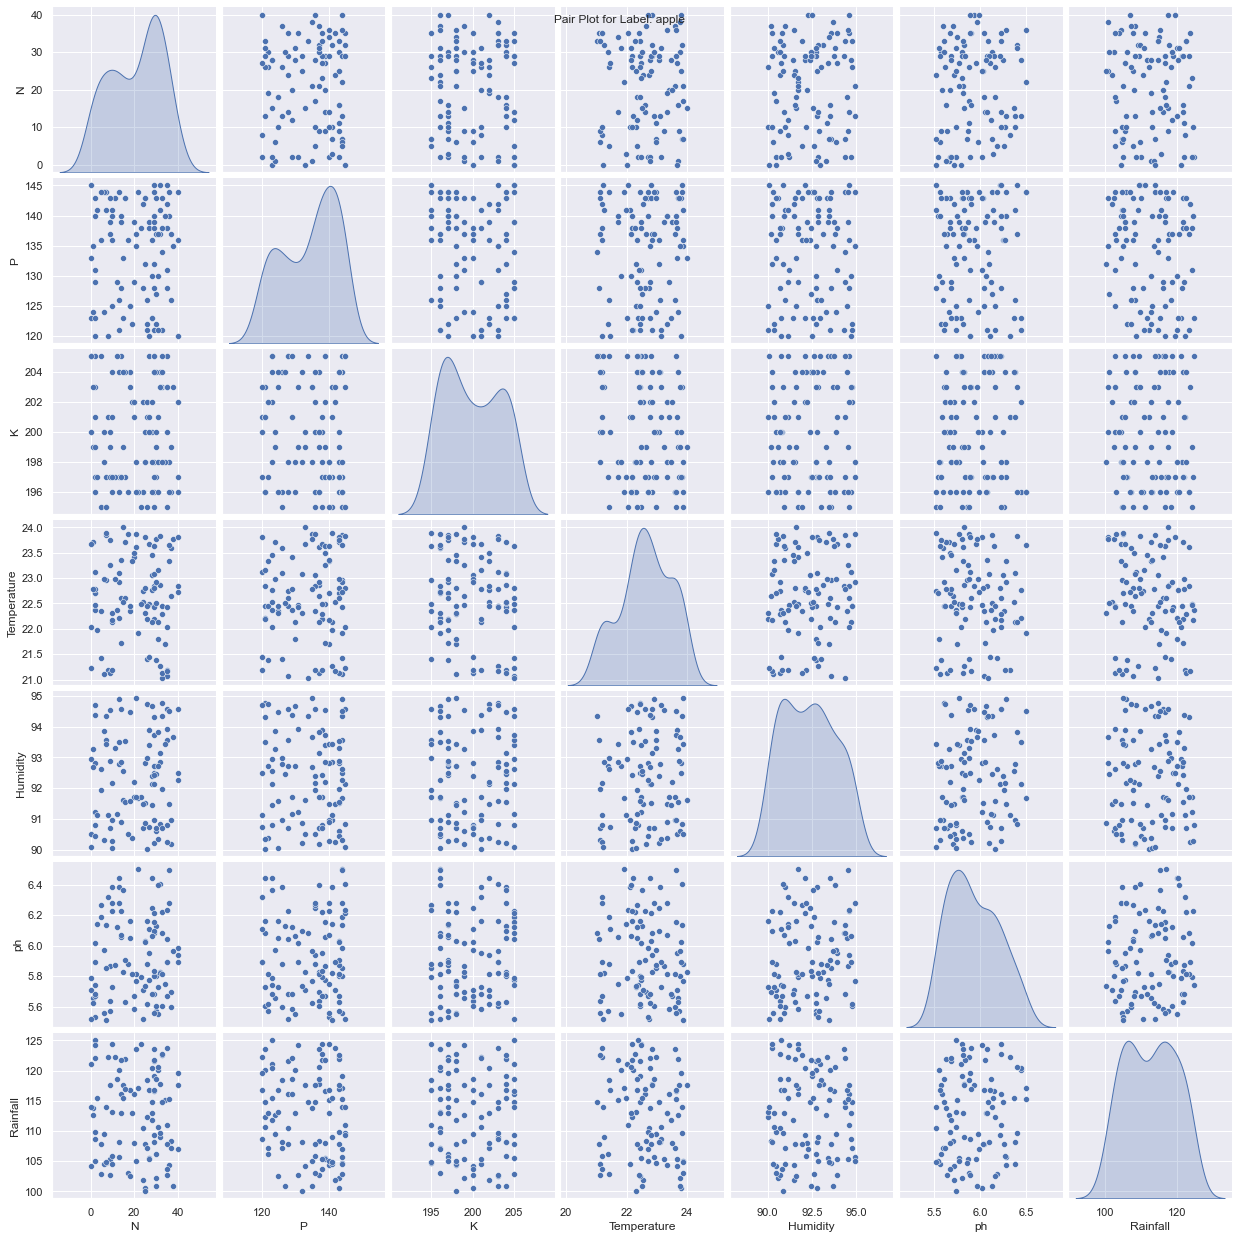

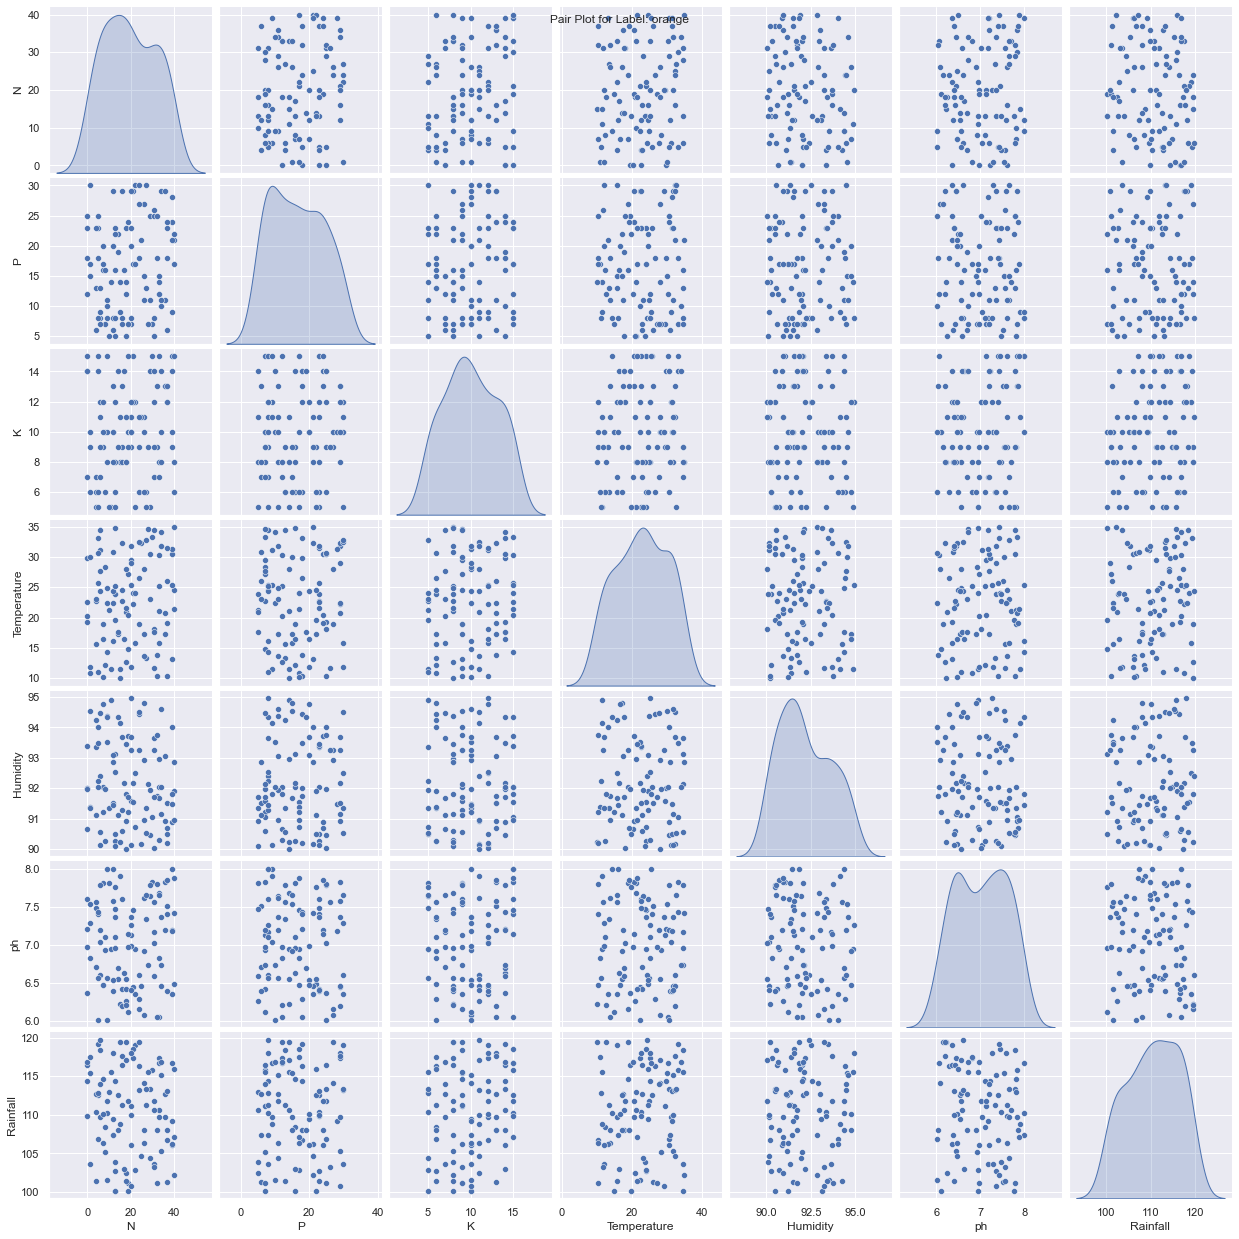

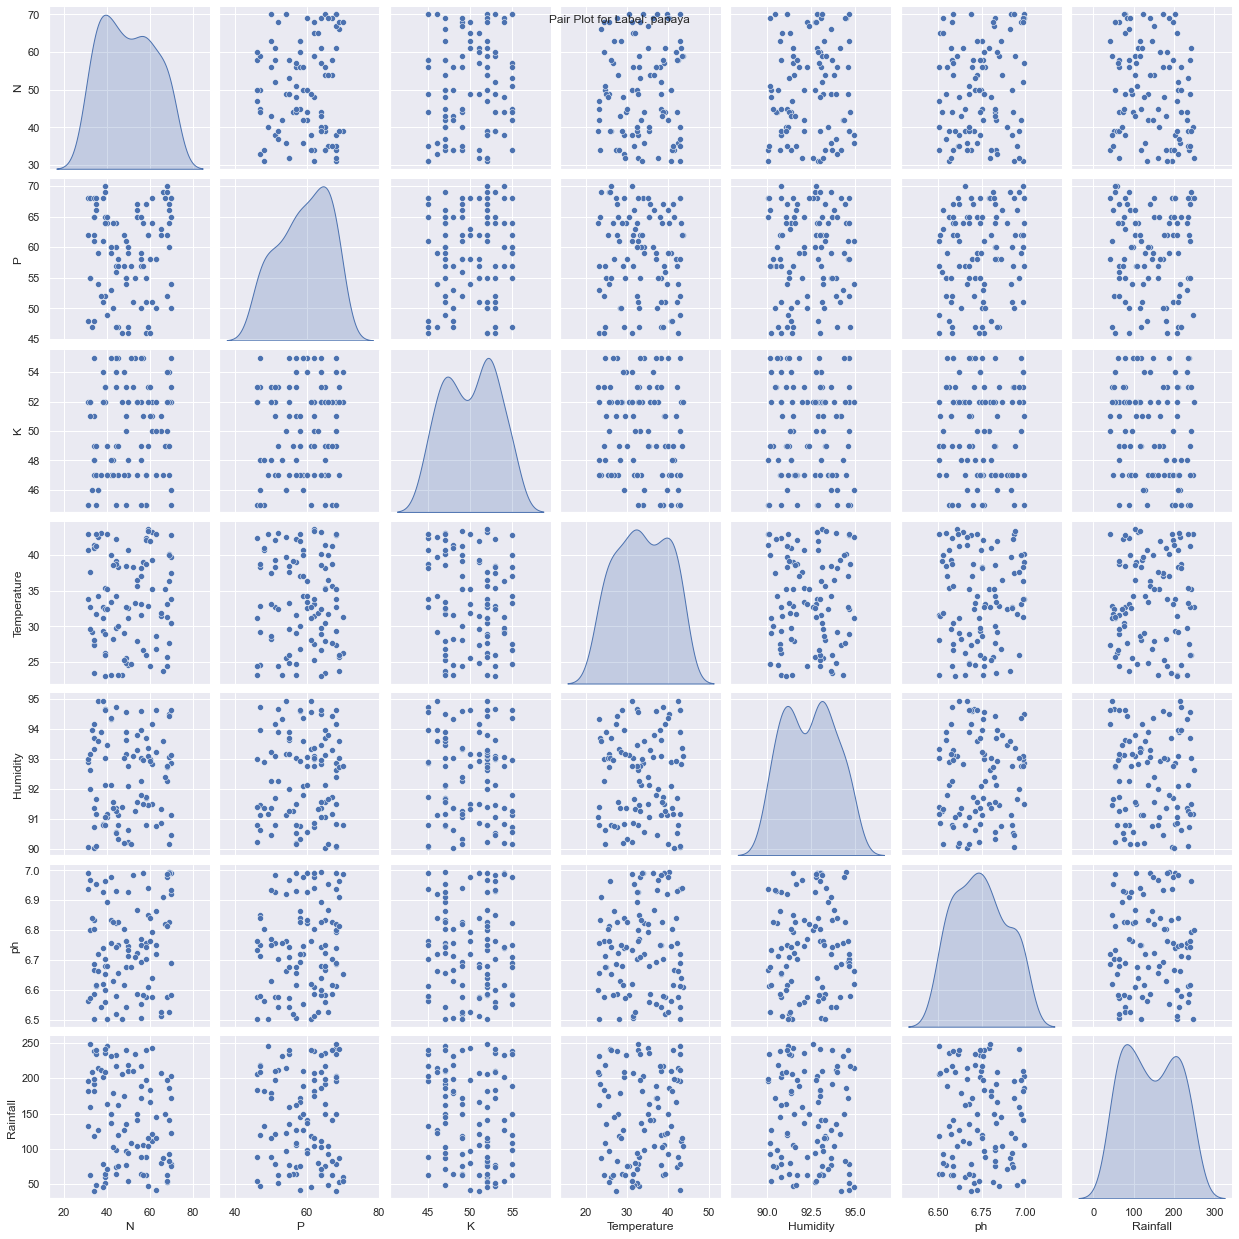

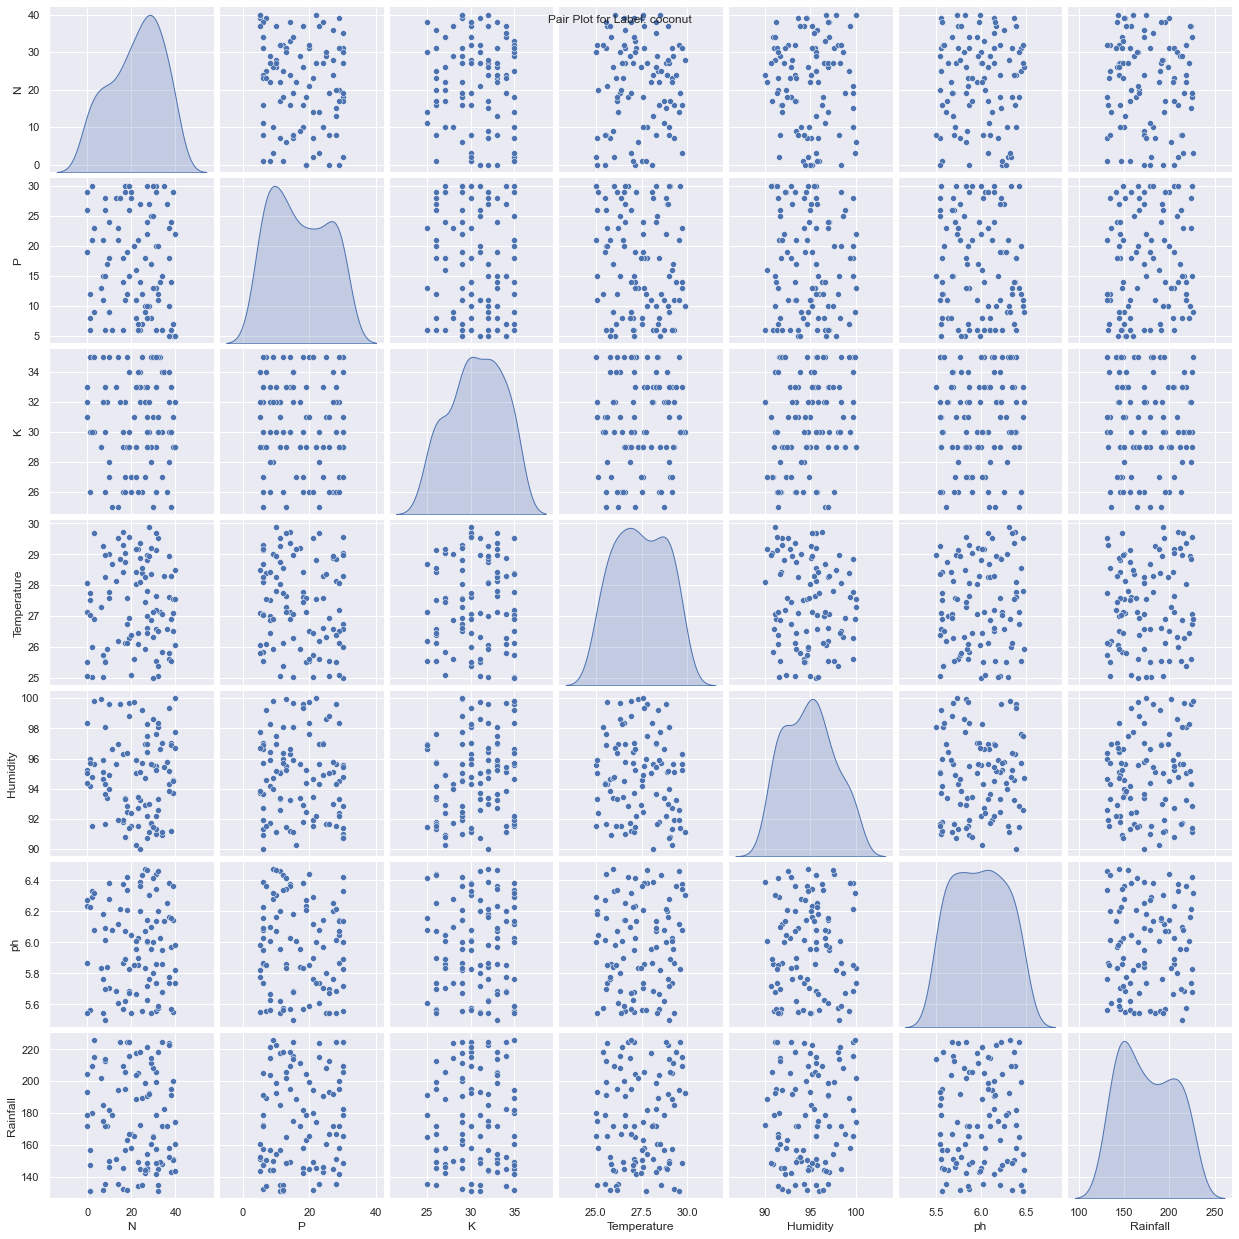

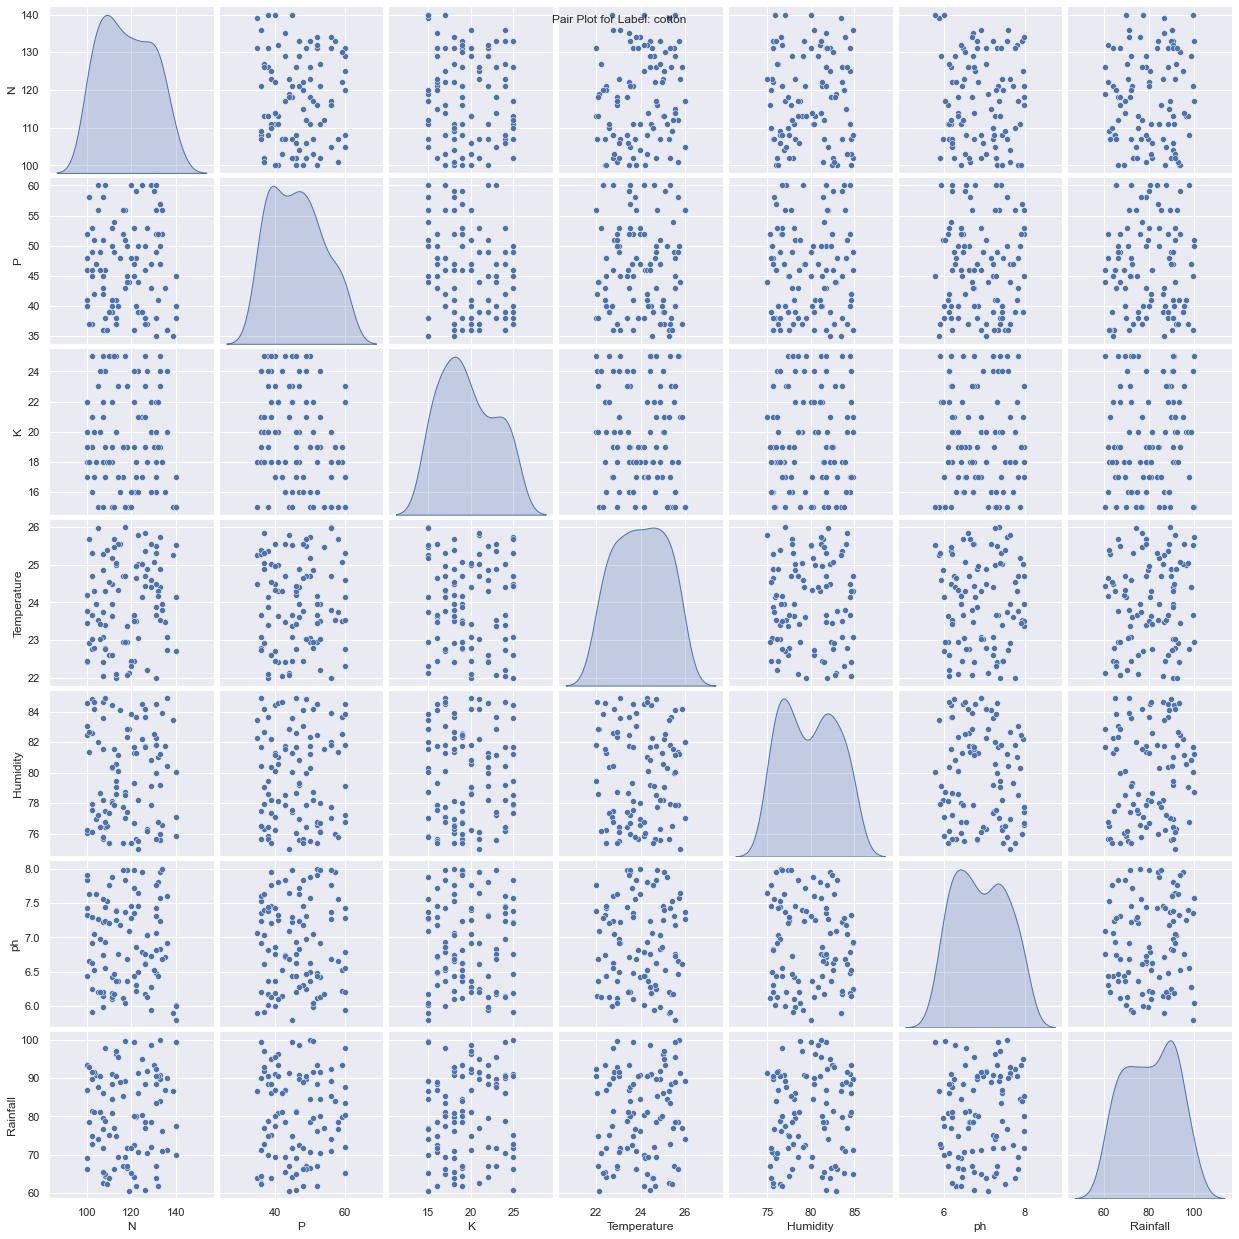

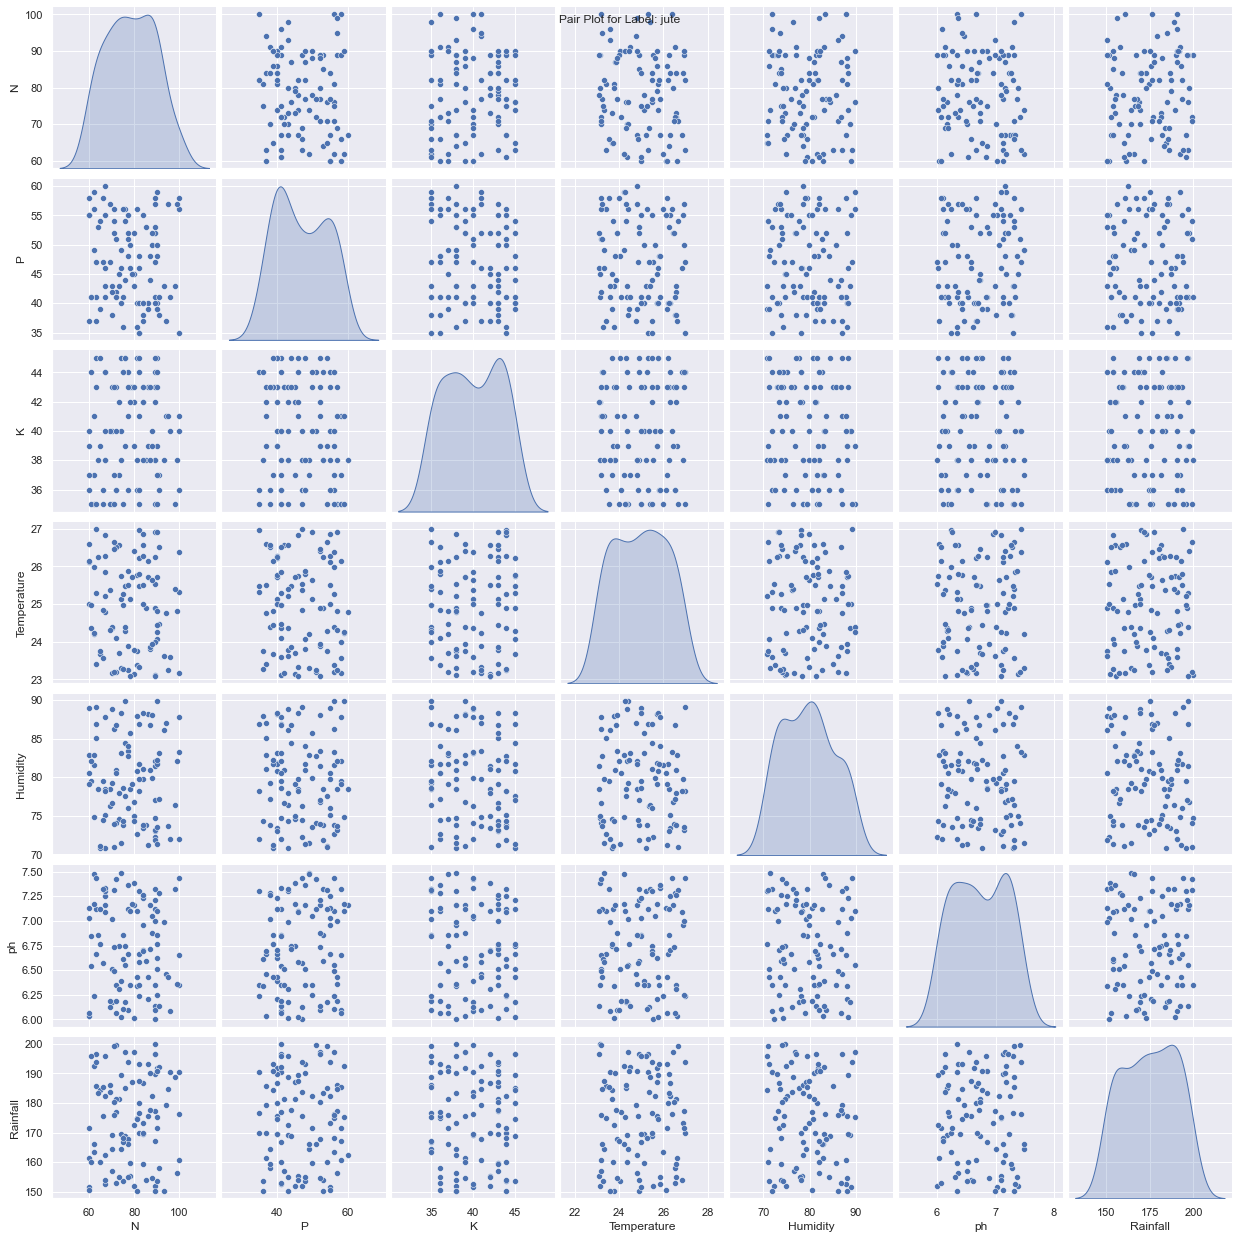

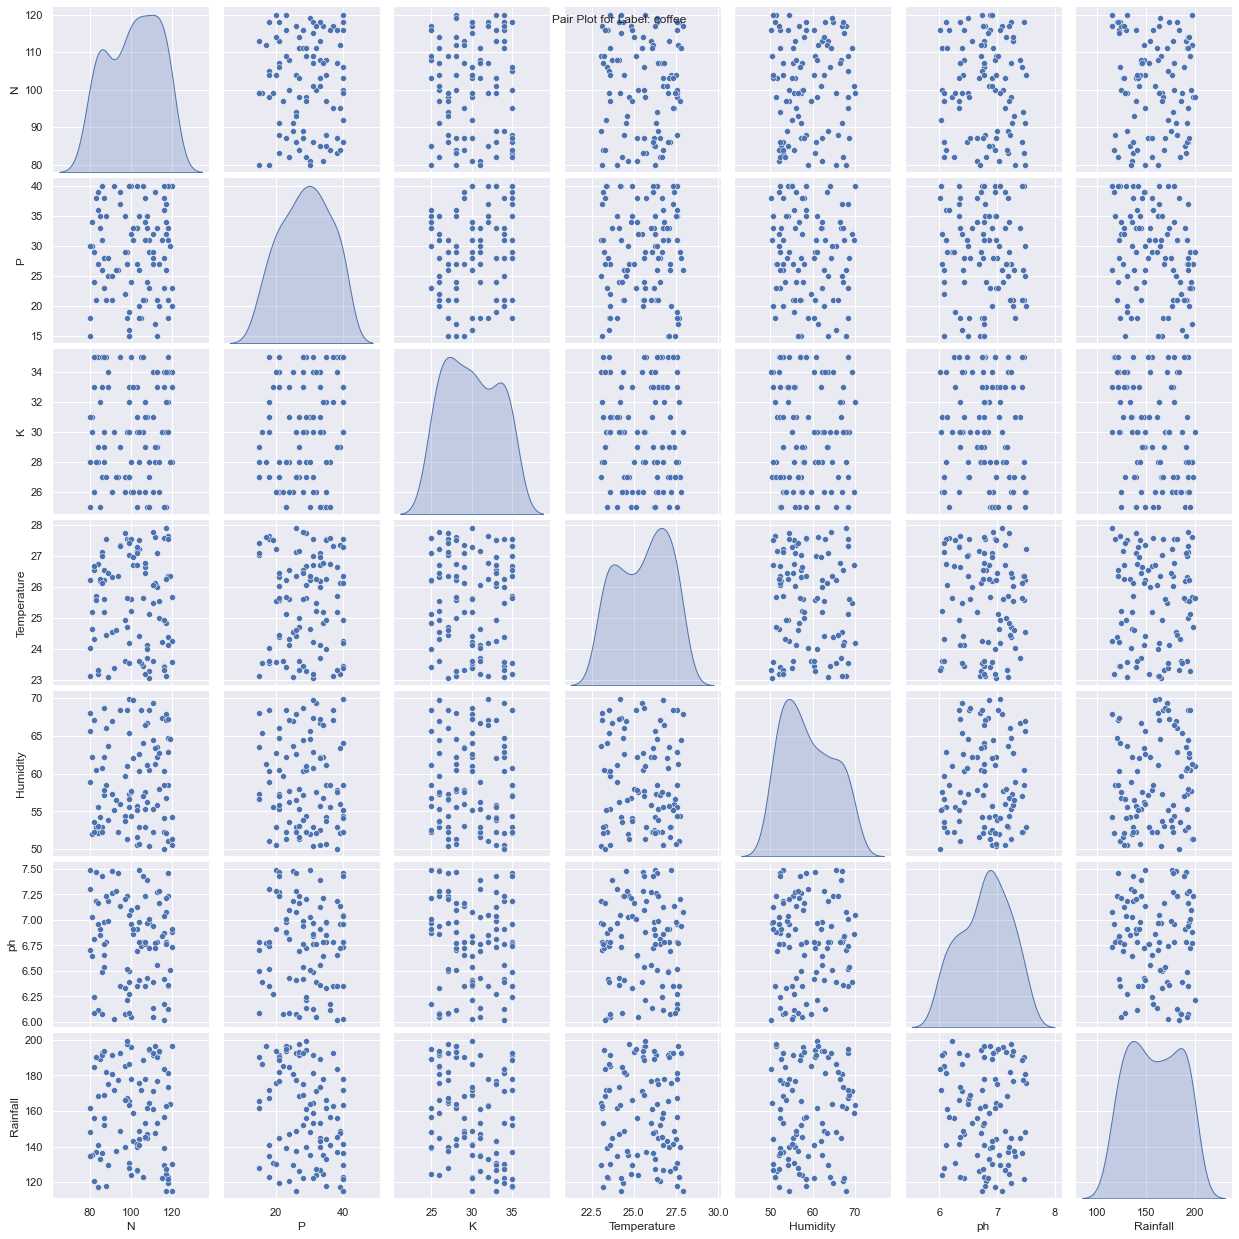

In [42]:
for label_value in df['label'].unique():
    subset_data = df[df['label'] == label_value]
    sns.pairplot(subset_data[columns_to_plot], diag_kind='kde')
    plot.suptitle(f'Pair Plot for Label: {label_value}')
    plot.show()

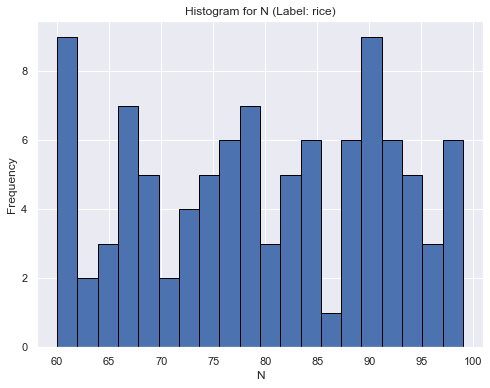

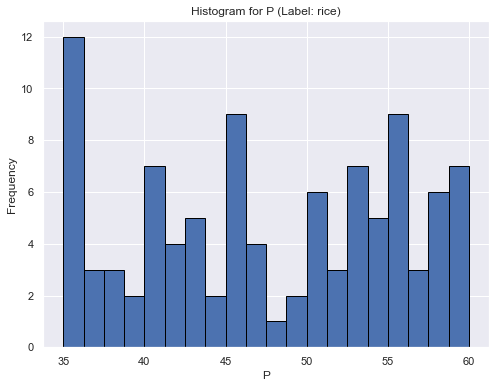

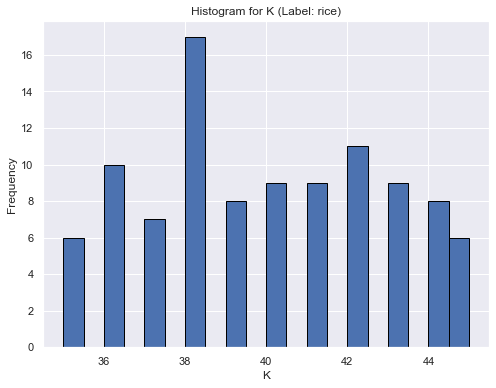

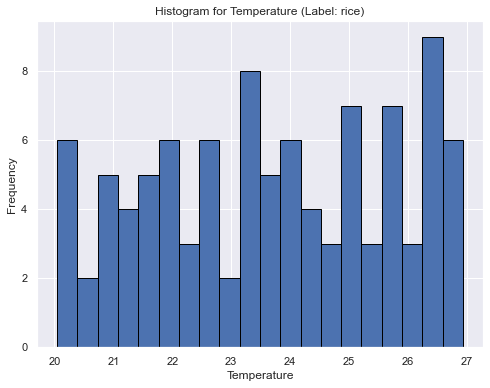

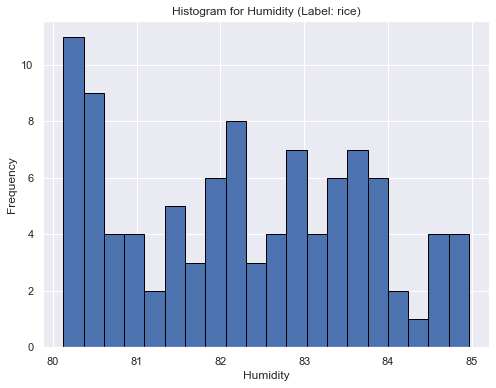

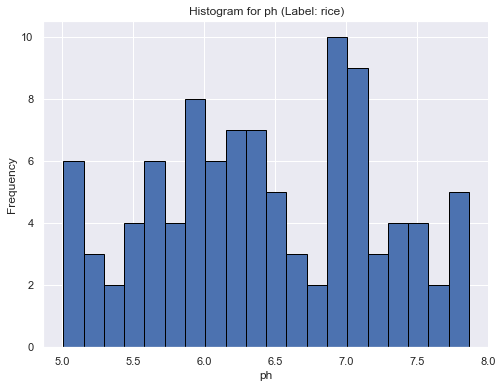

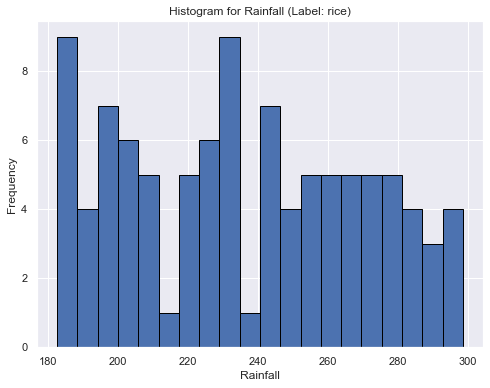

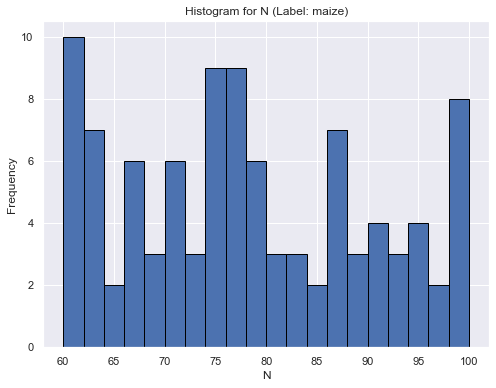

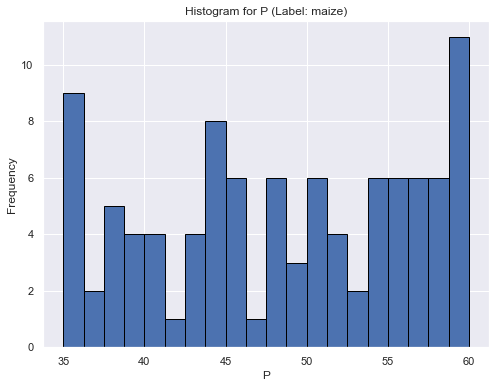

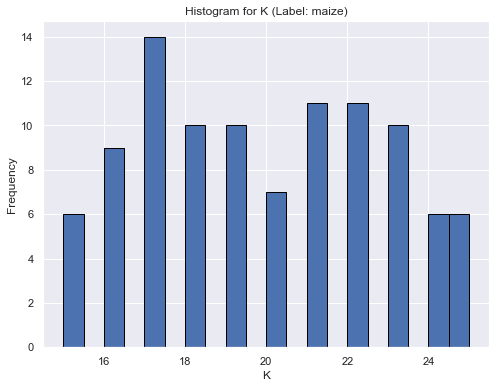

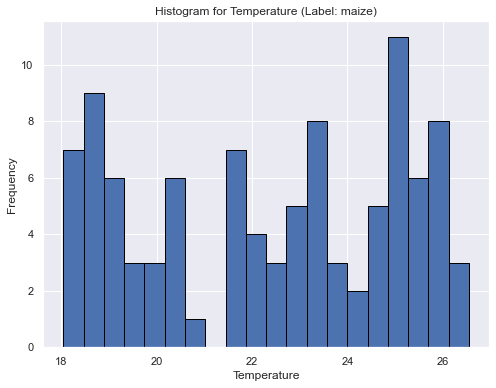

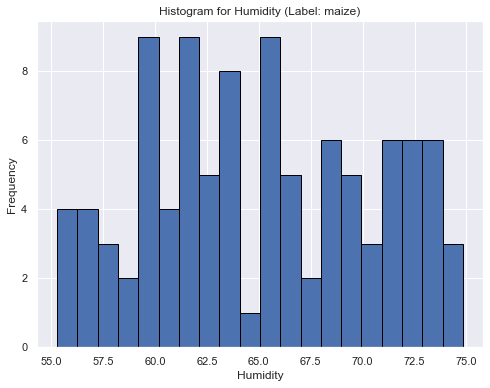

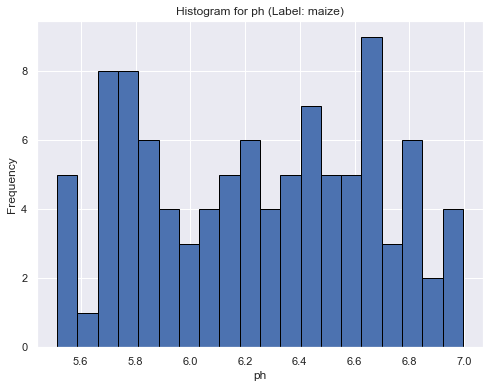

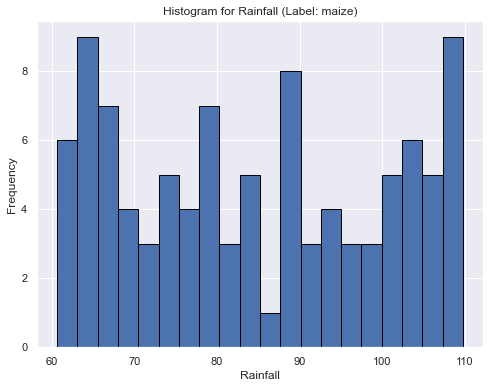

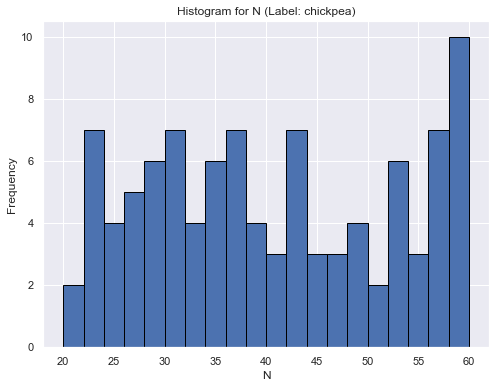

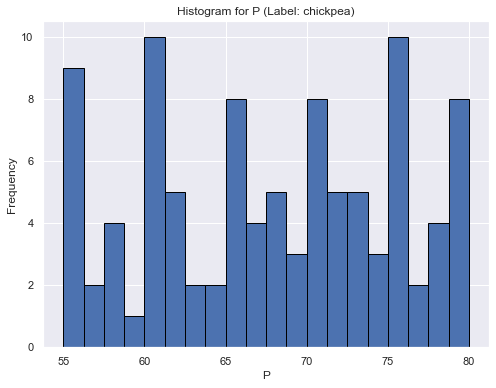

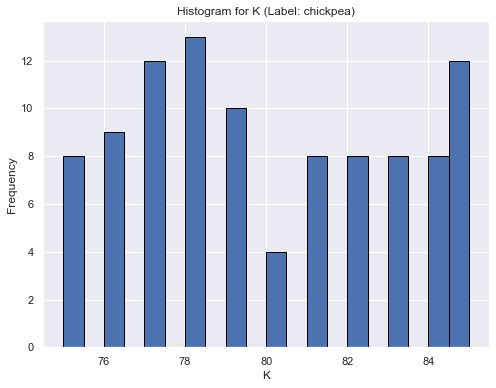

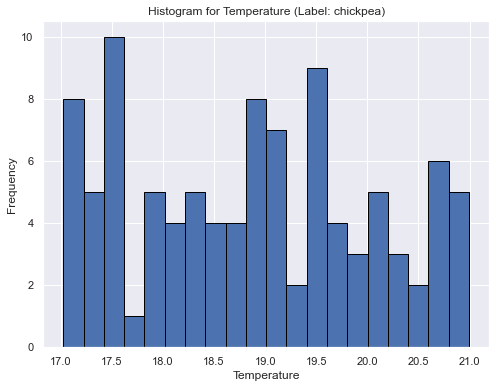

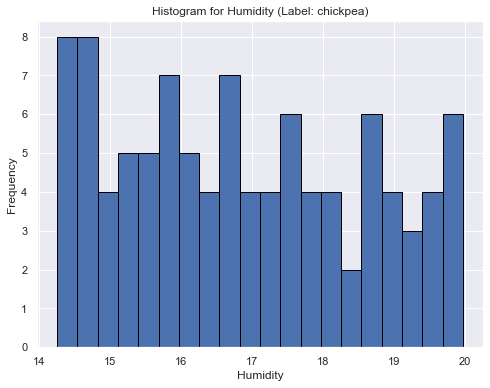

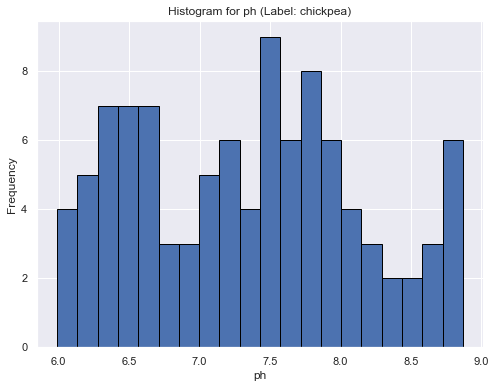

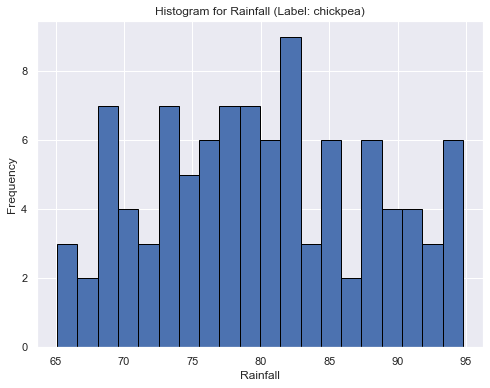

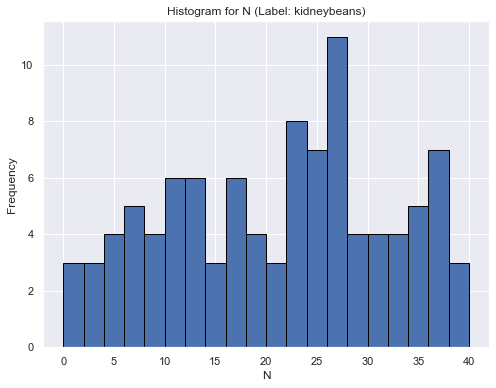

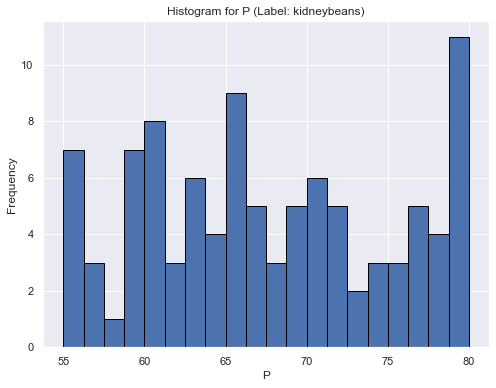

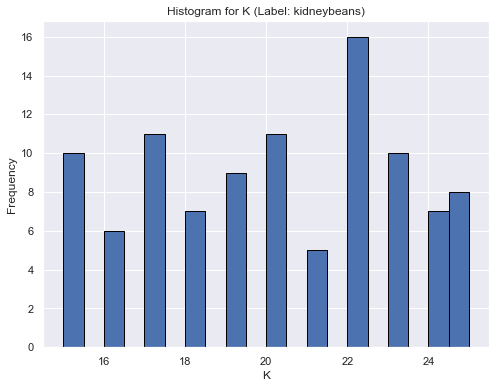

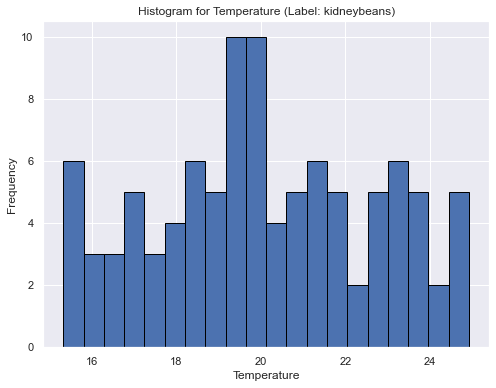

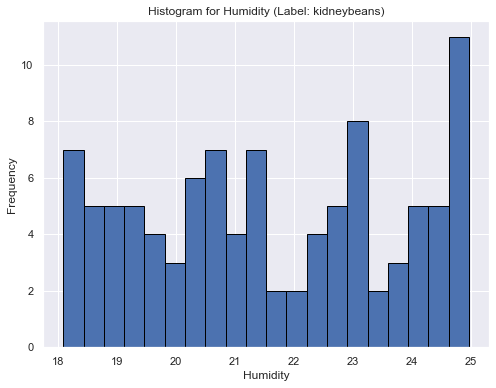

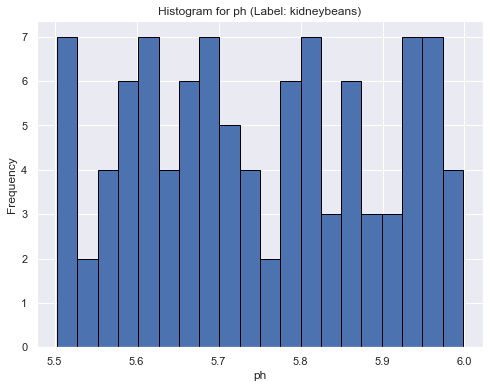

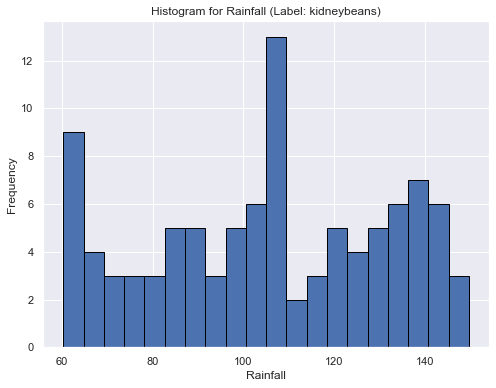

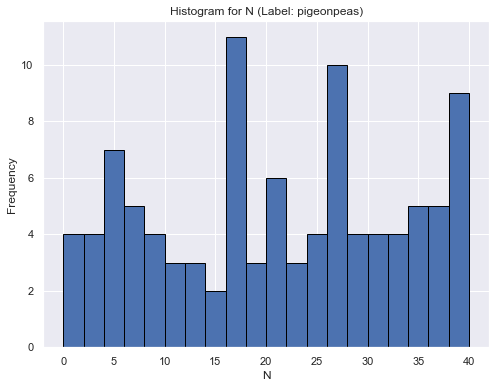

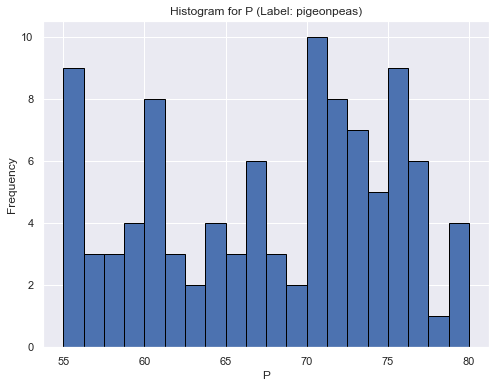

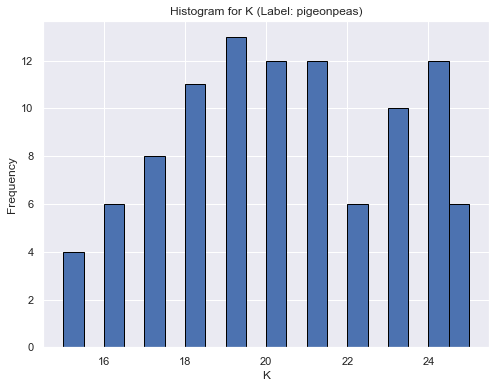

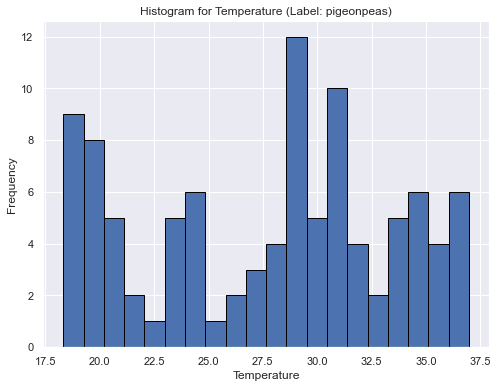

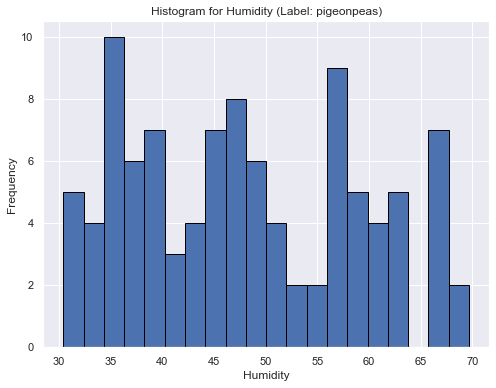

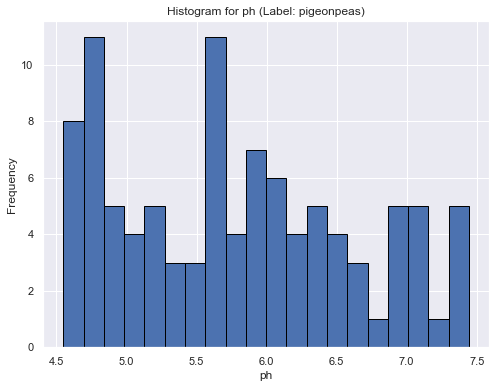

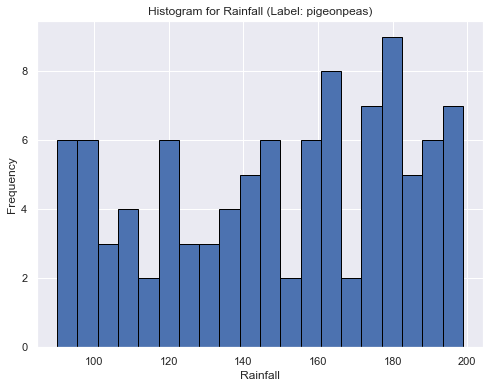

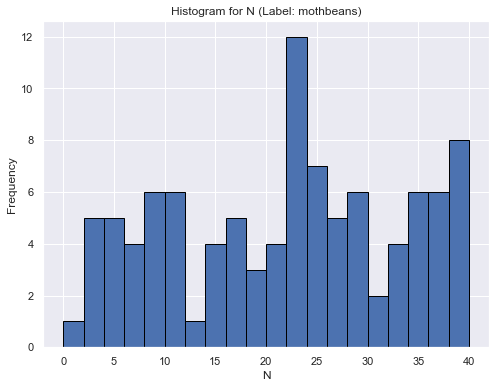

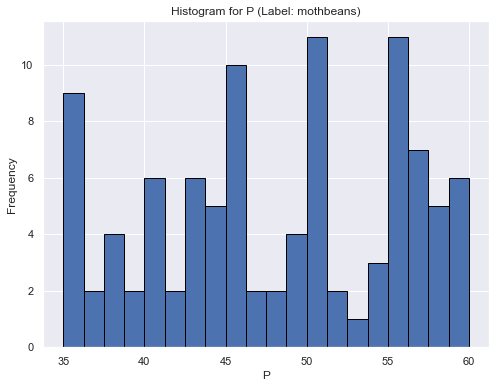

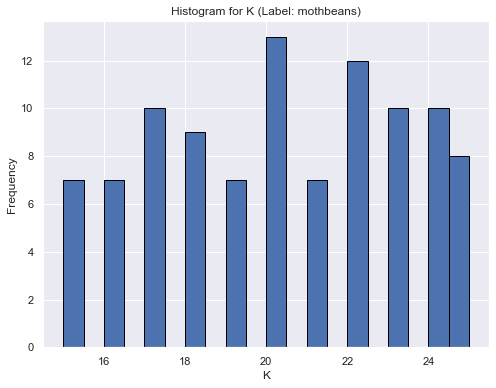

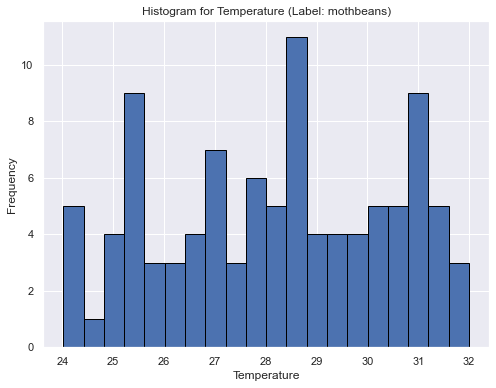

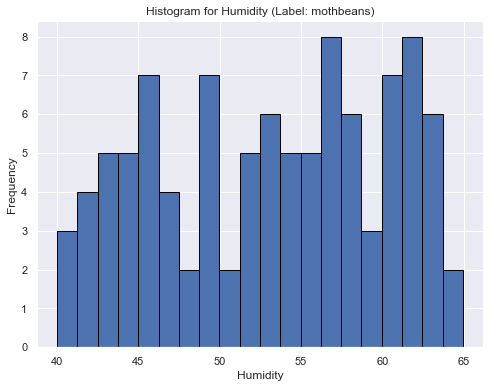

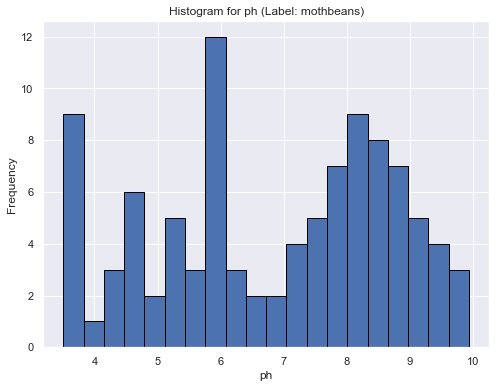

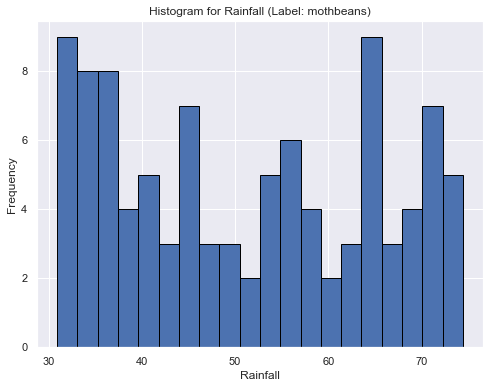

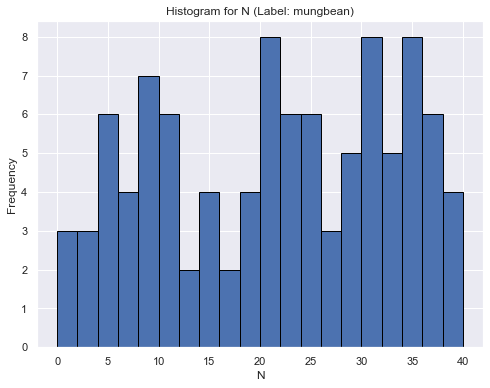

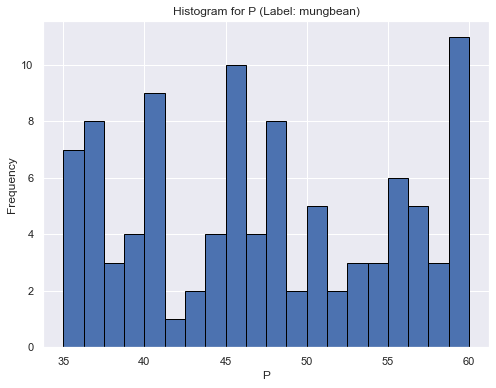

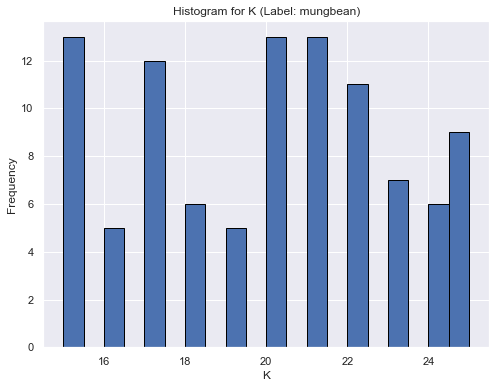

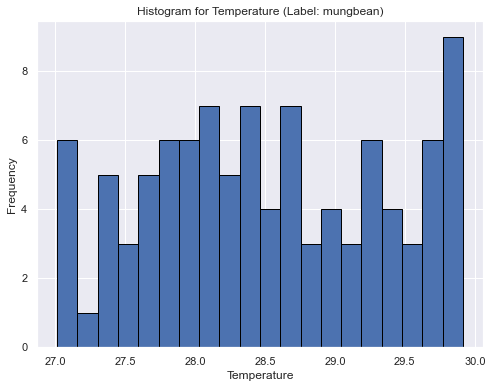

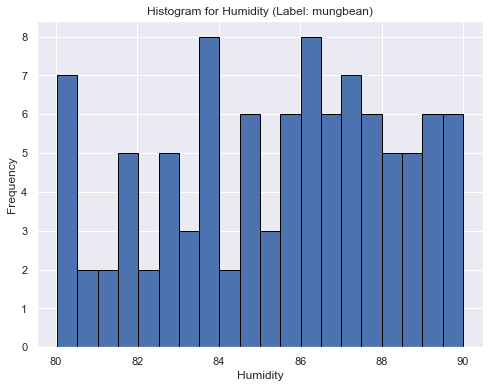

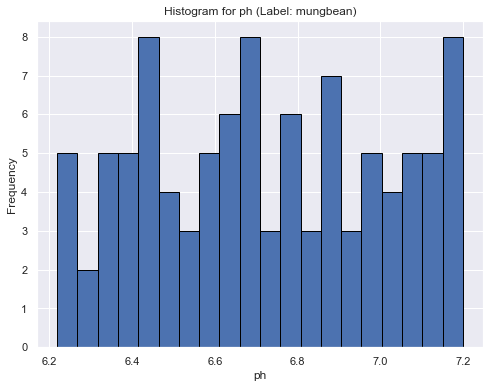

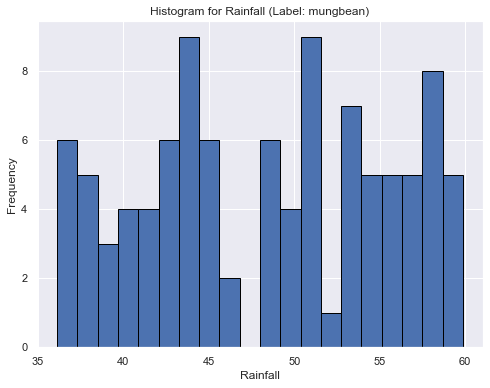

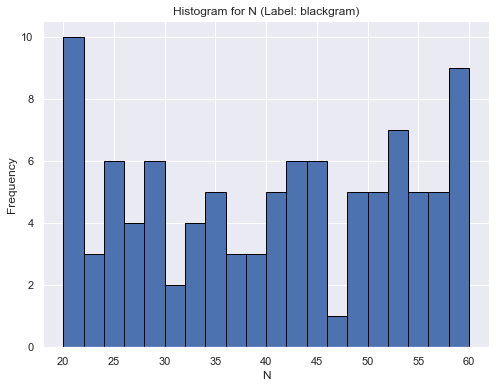

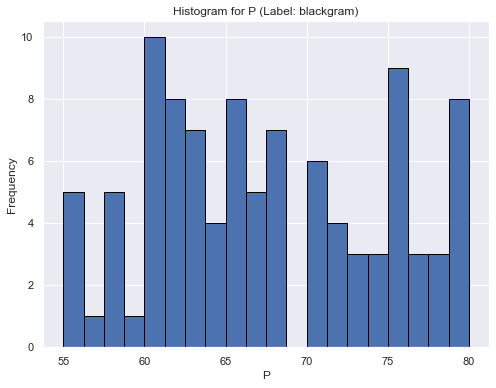

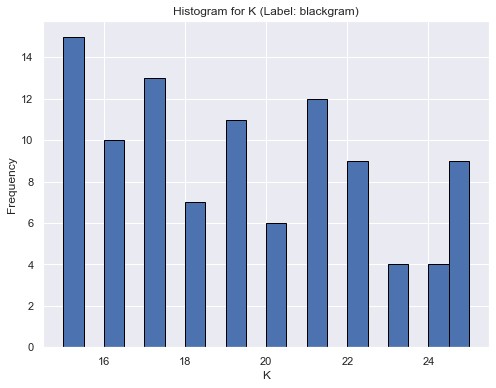

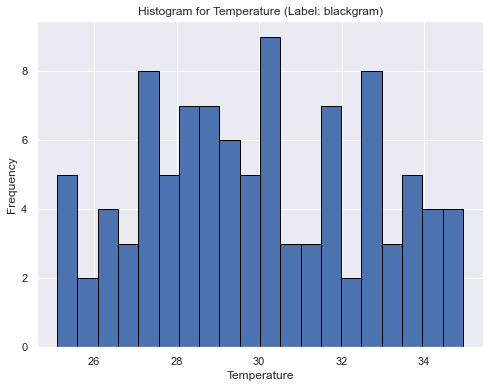

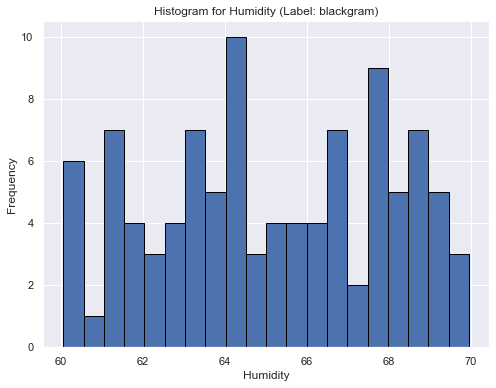

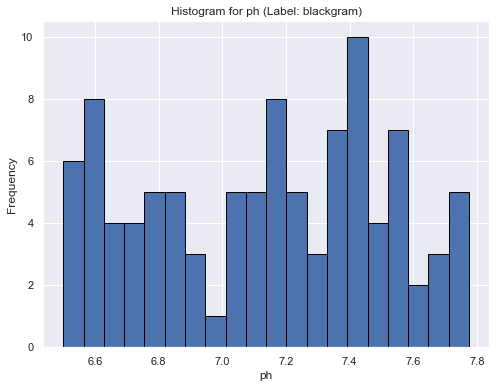

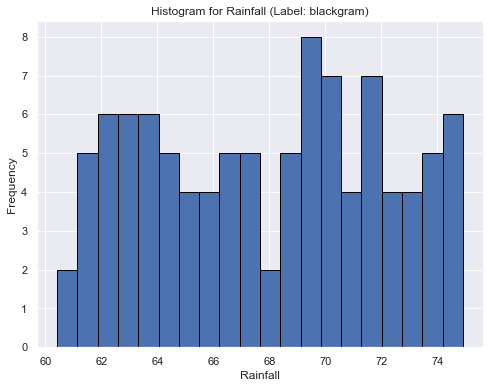

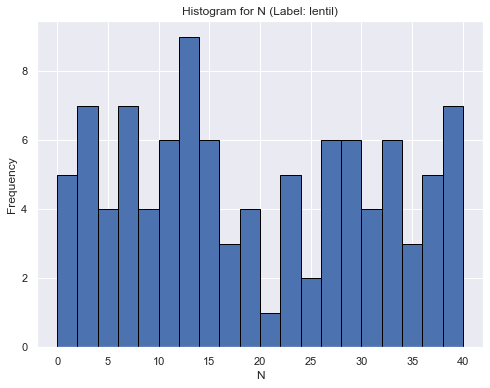

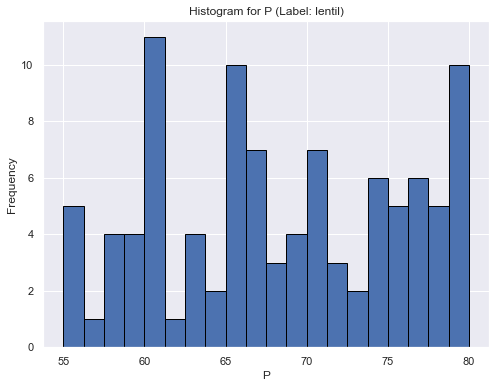

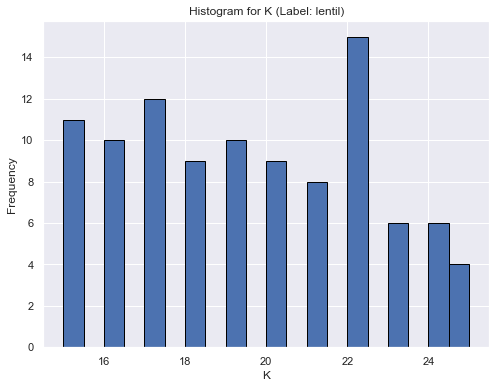

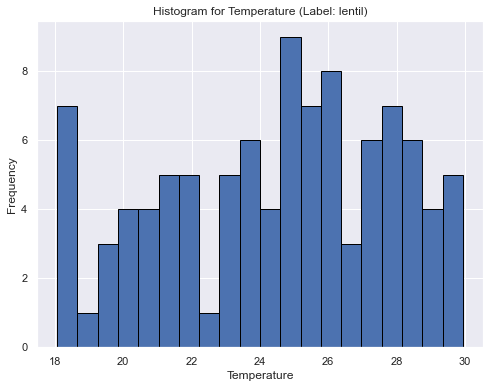

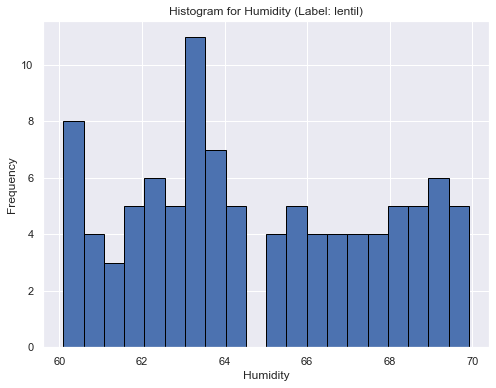

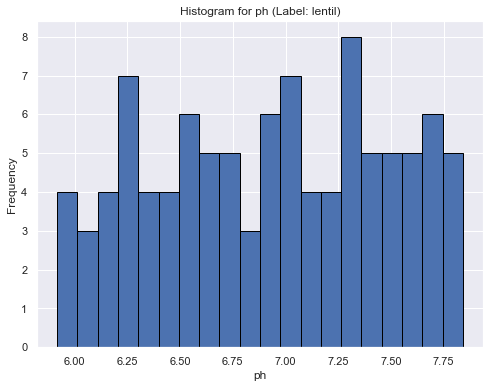

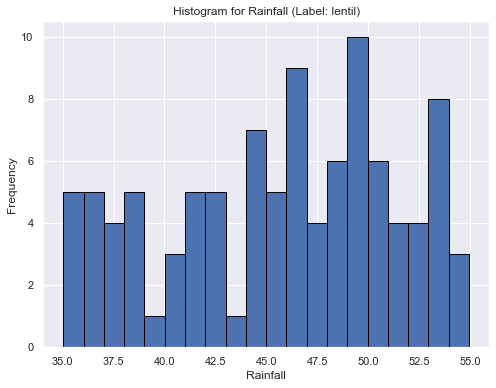

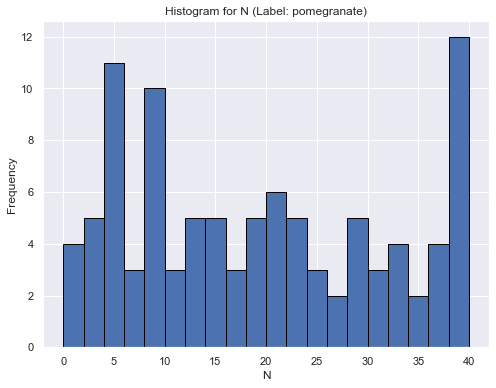

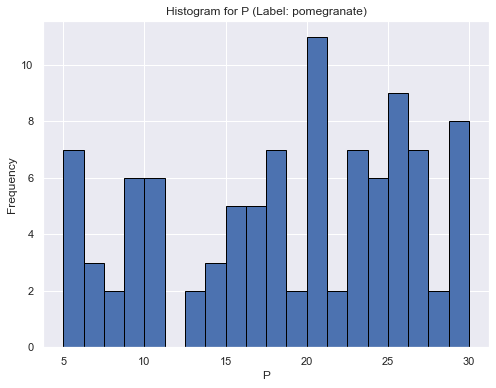

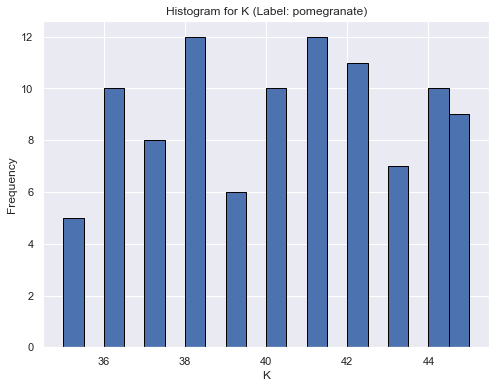

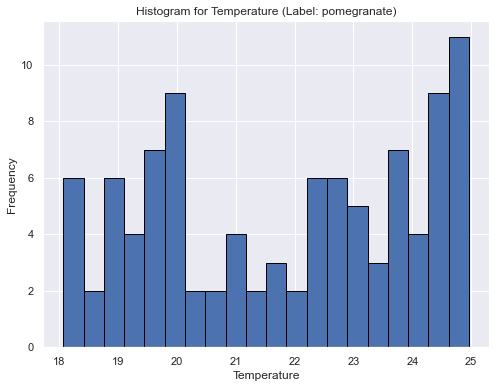

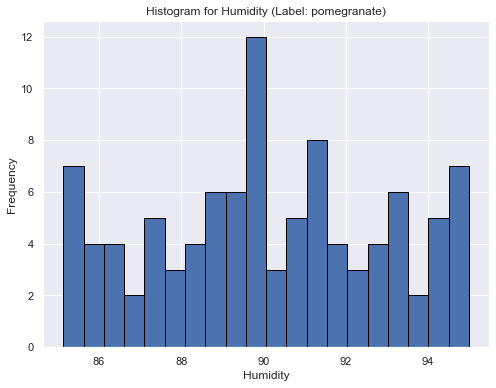

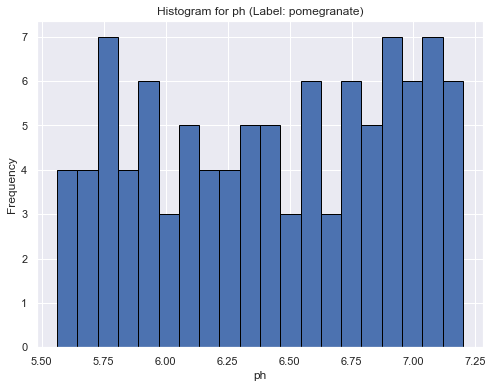

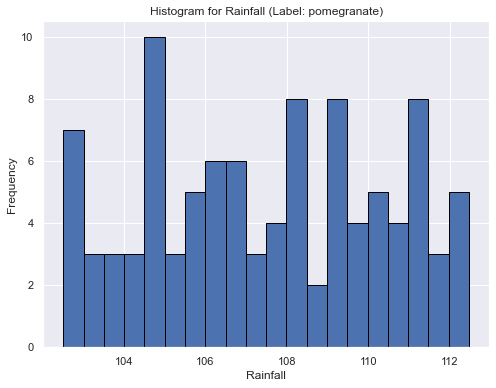

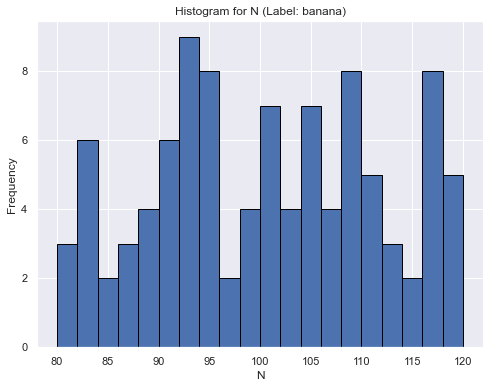

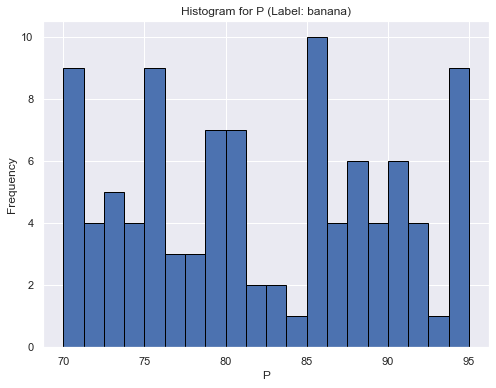

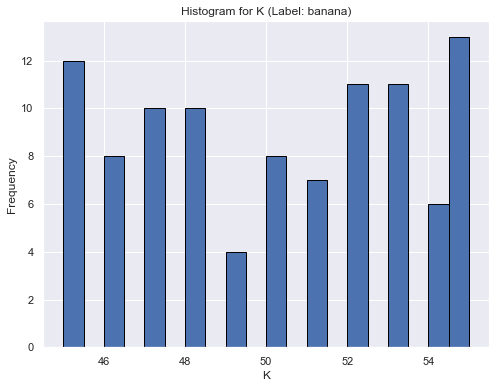

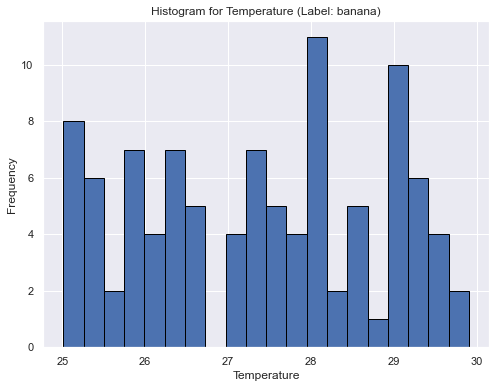

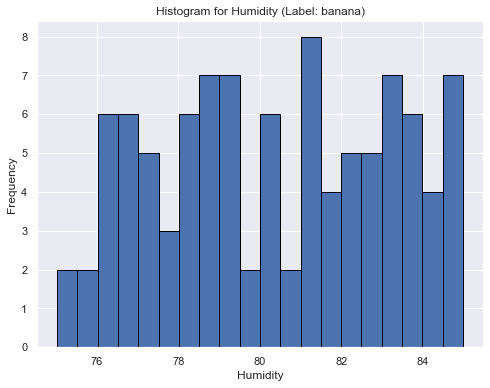

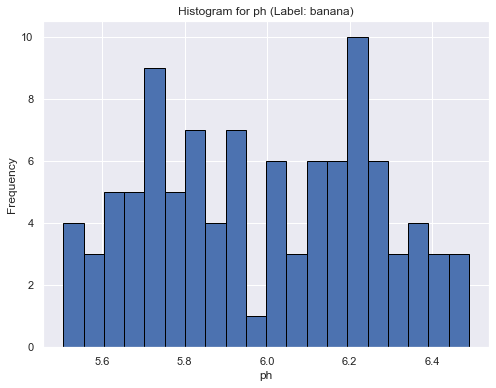

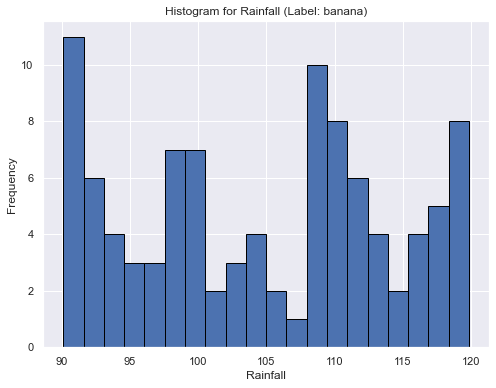

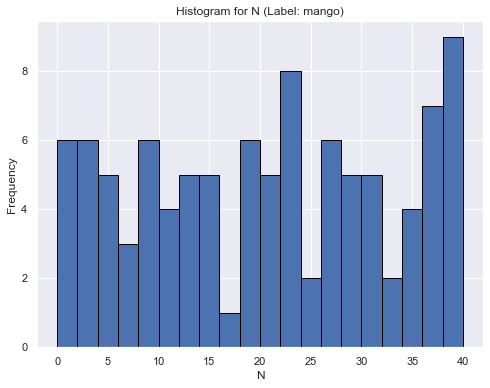

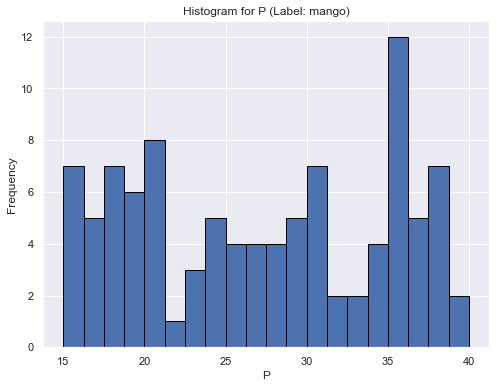

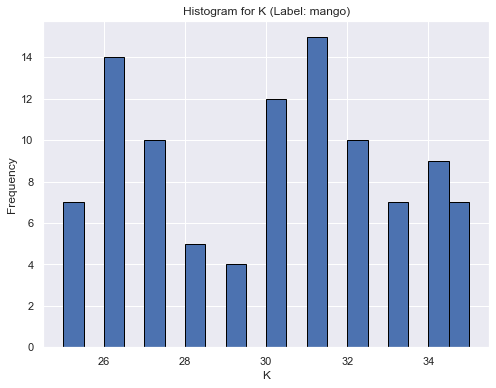

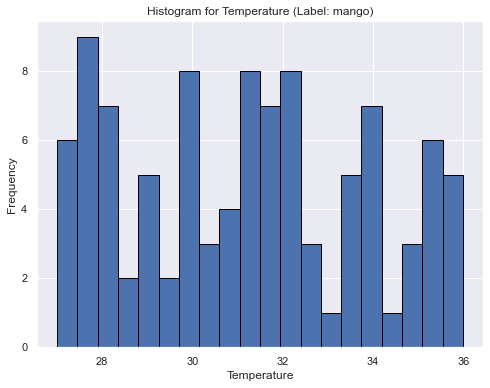

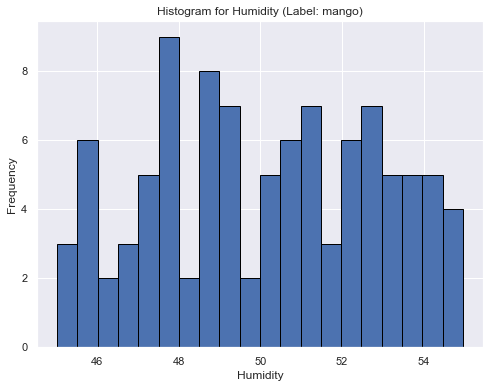

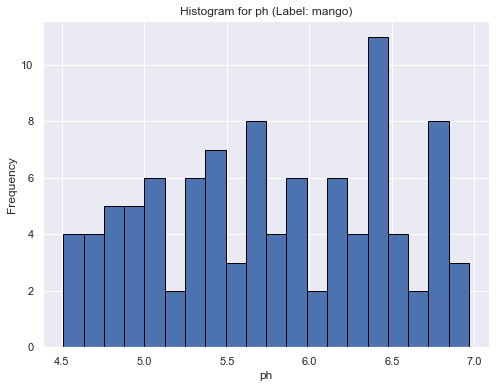

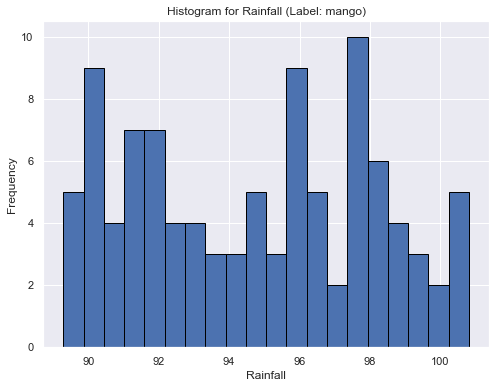

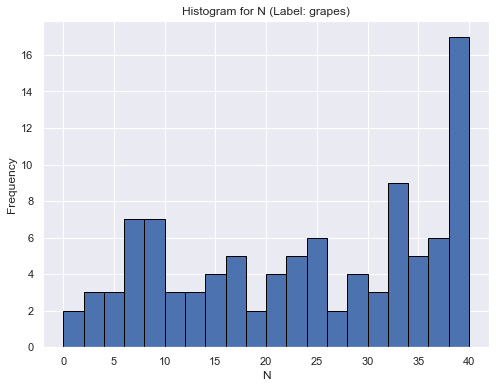

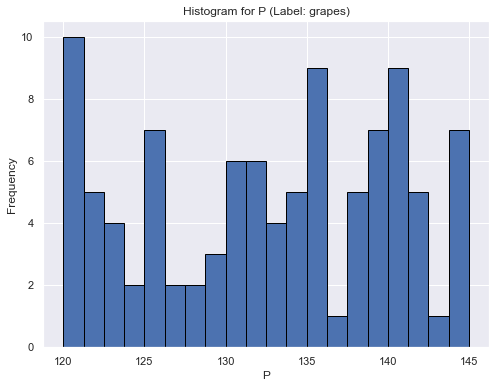

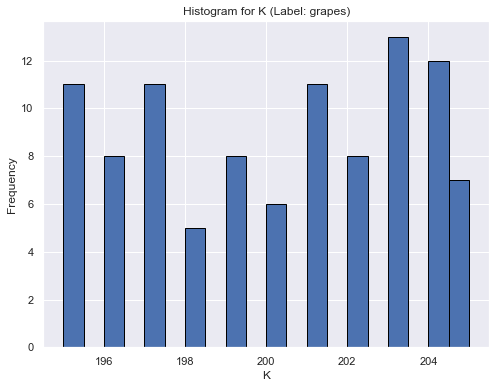

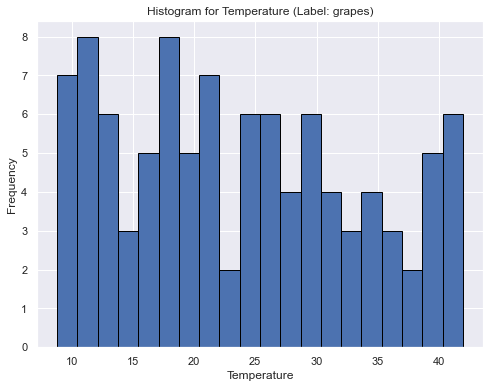

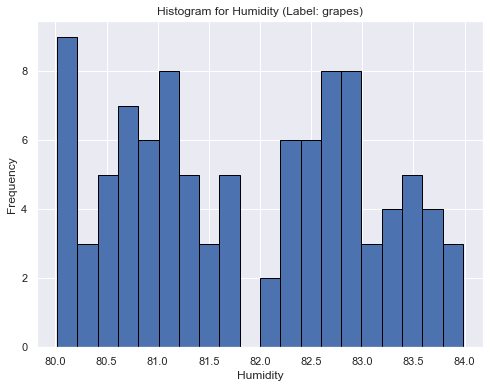

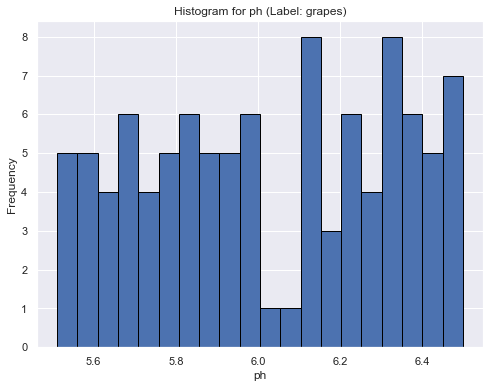

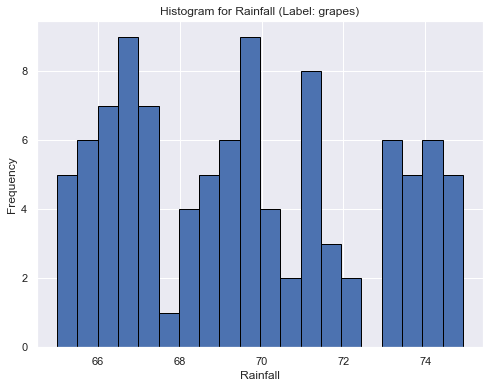

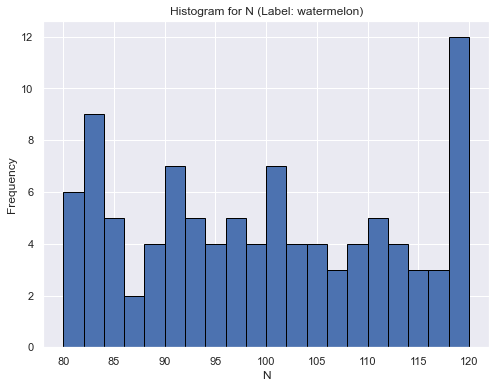

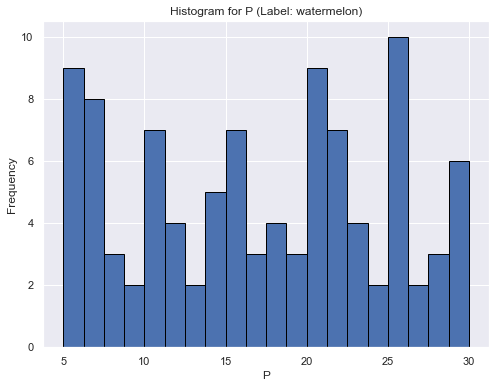

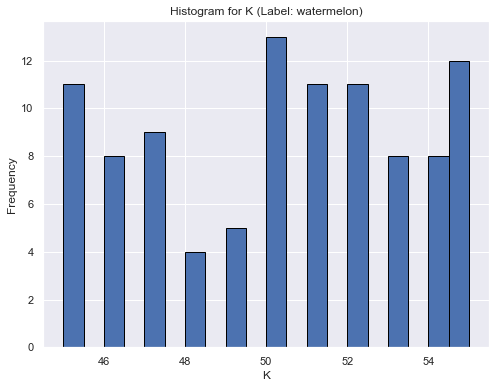

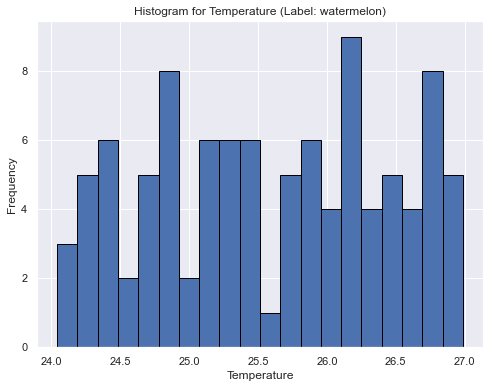

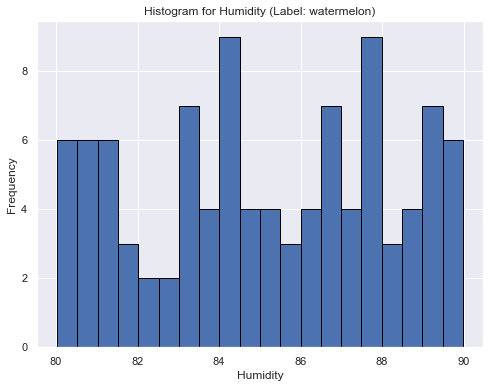

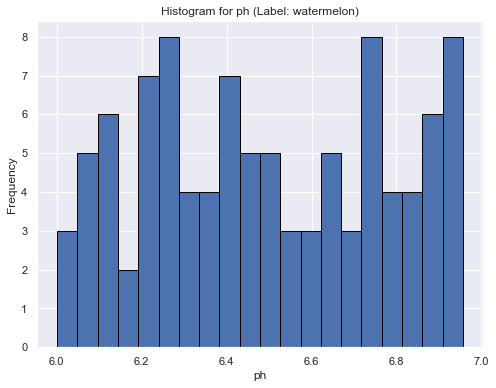

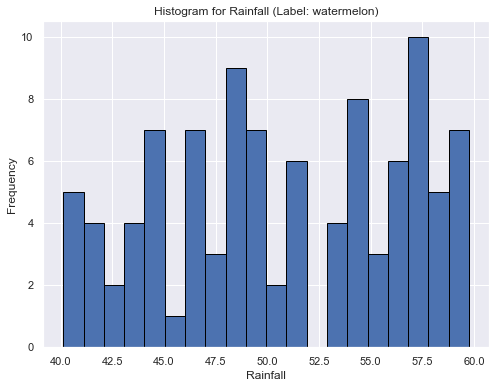

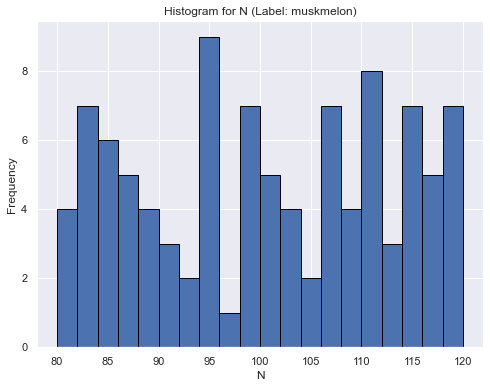

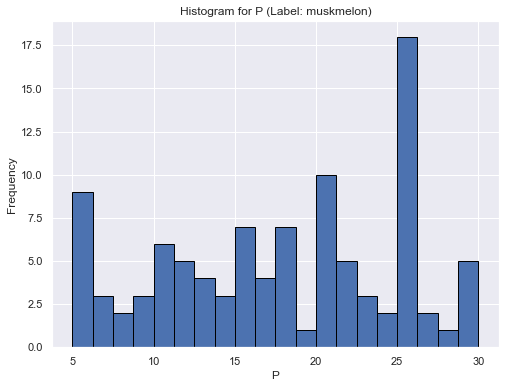

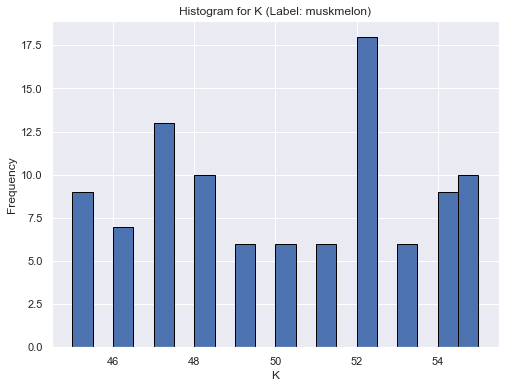

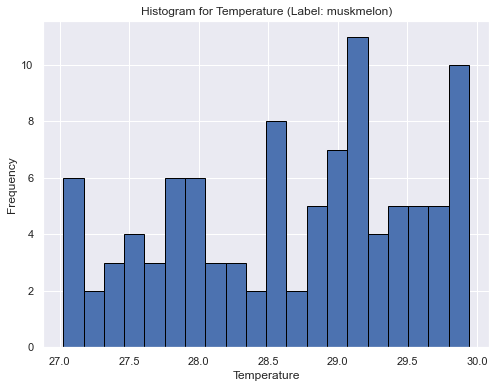

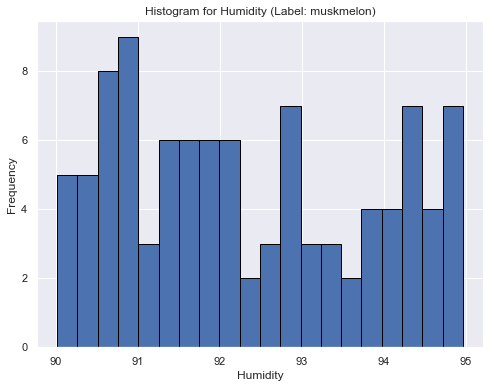

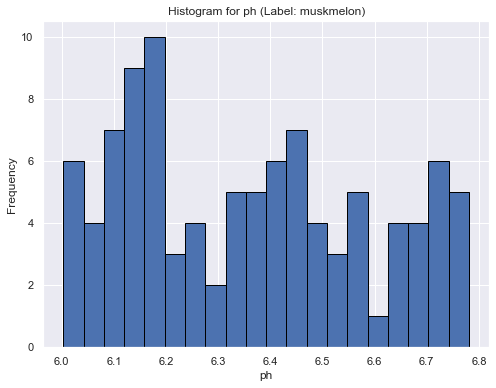

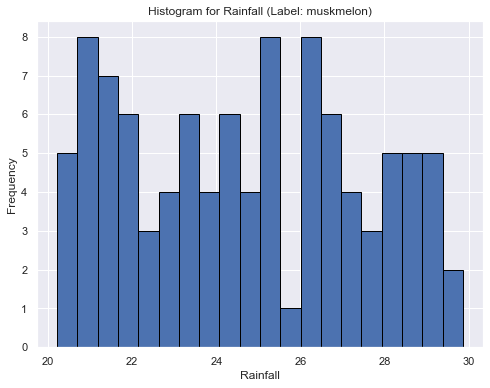

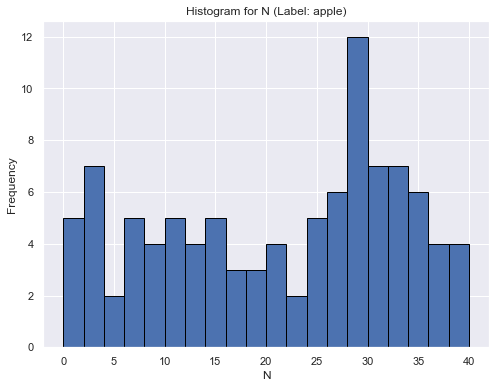

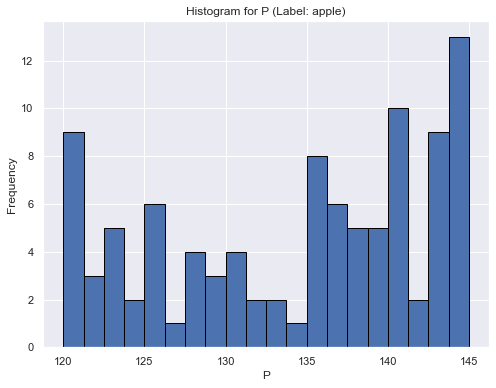

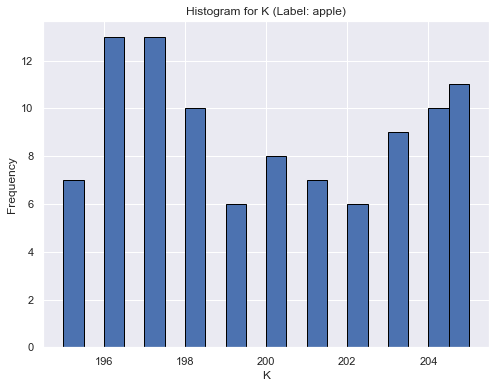

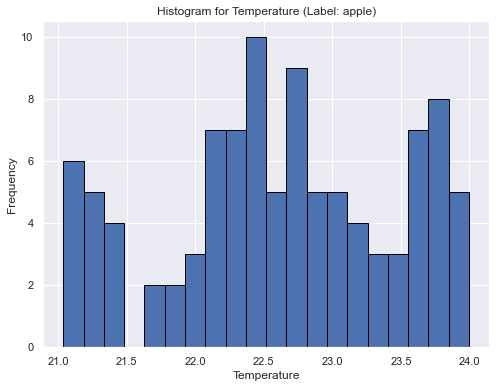

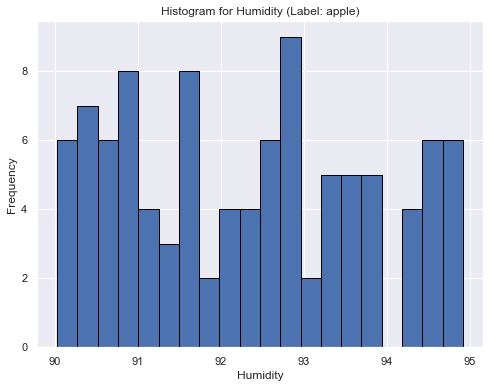

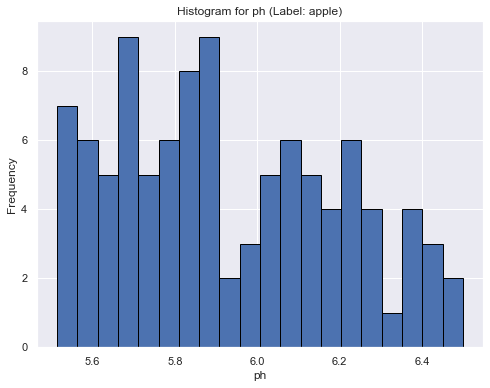

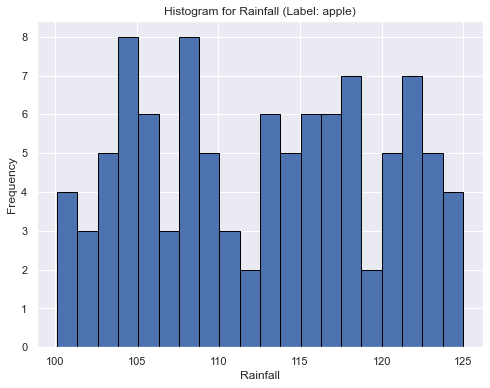

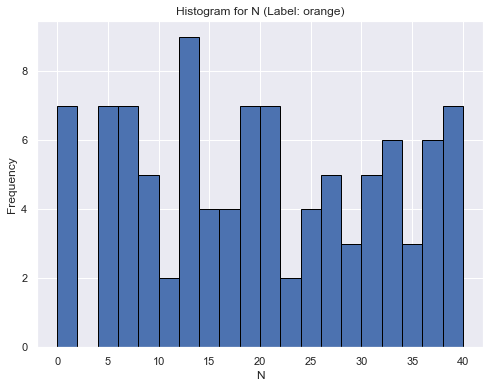

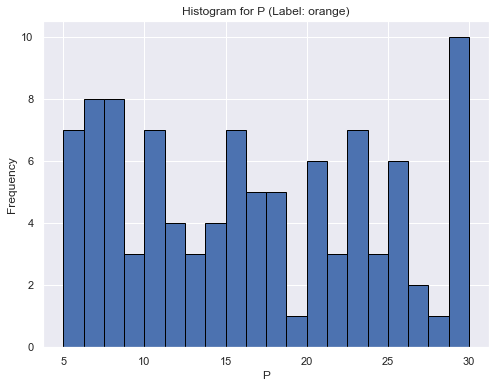

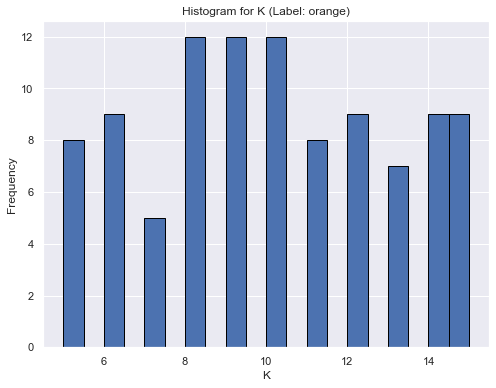

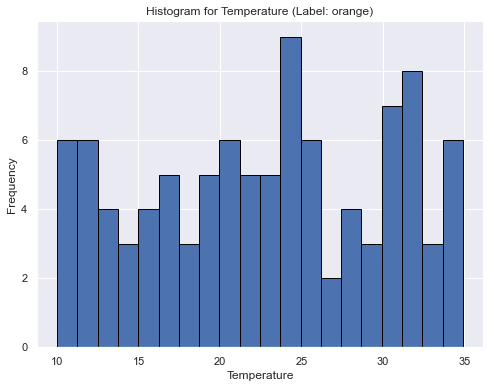

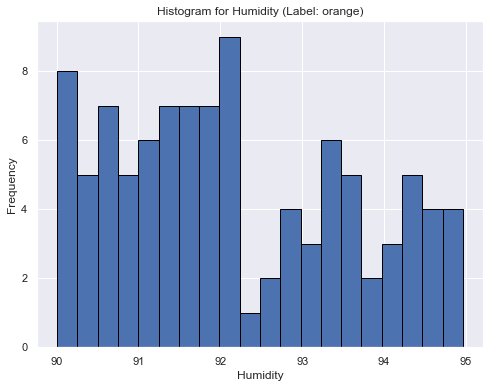

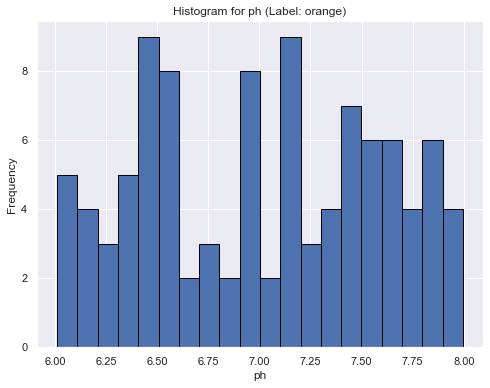

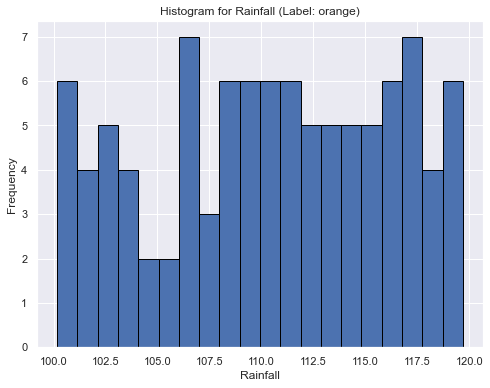

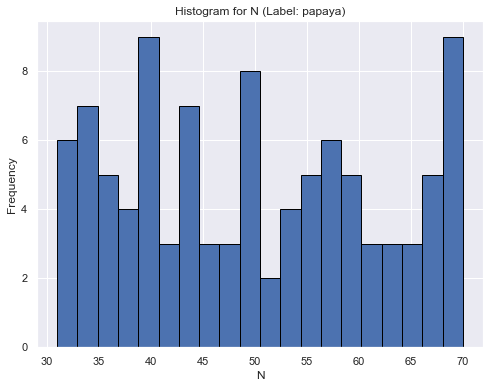

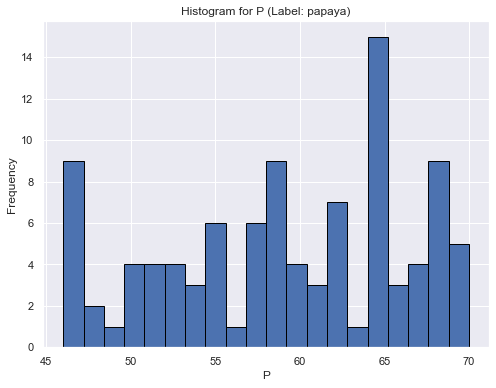

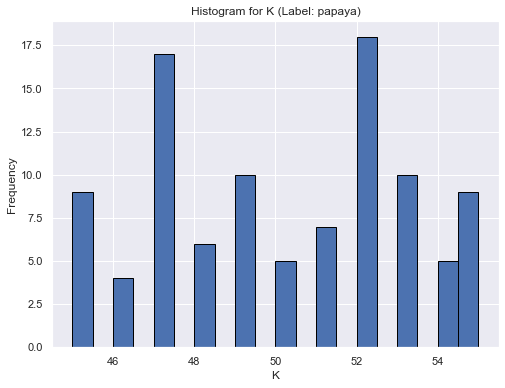

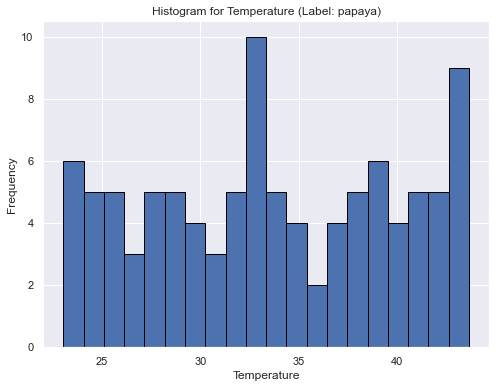

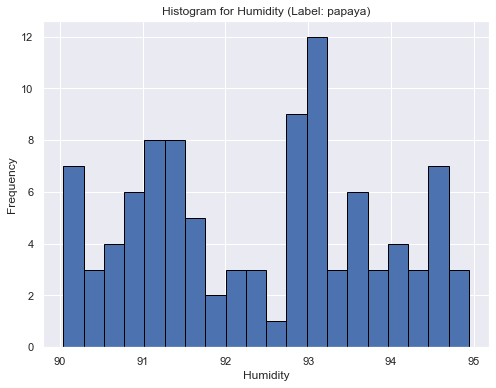

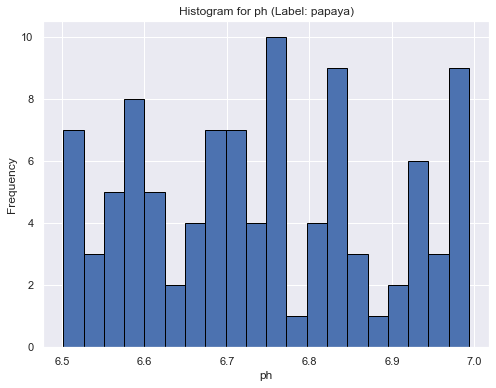

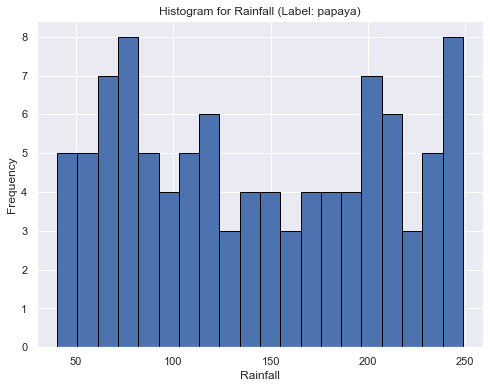

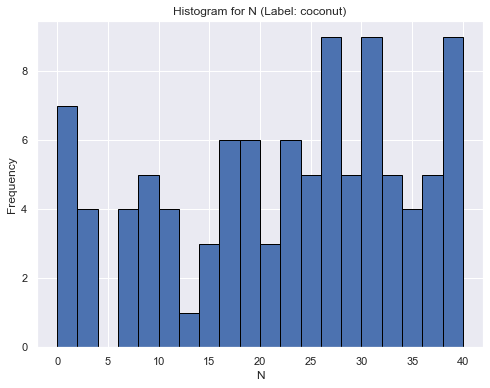

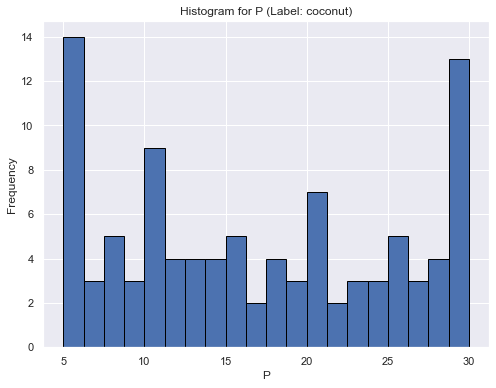

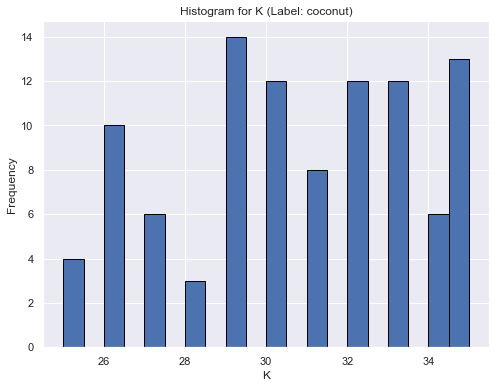

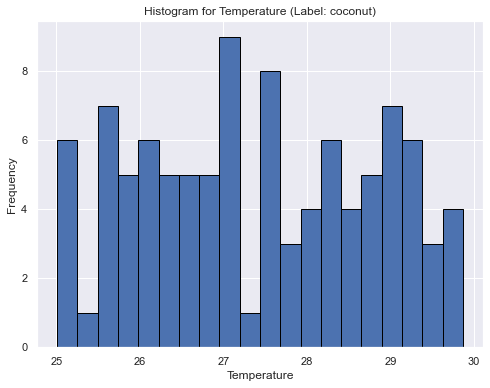

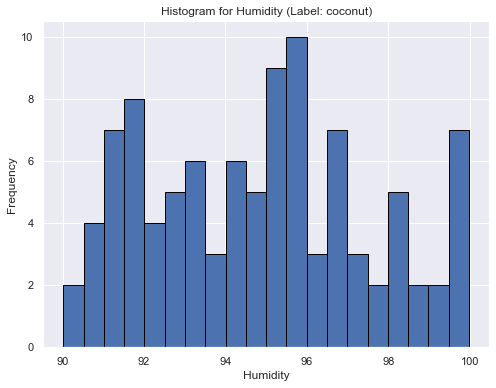

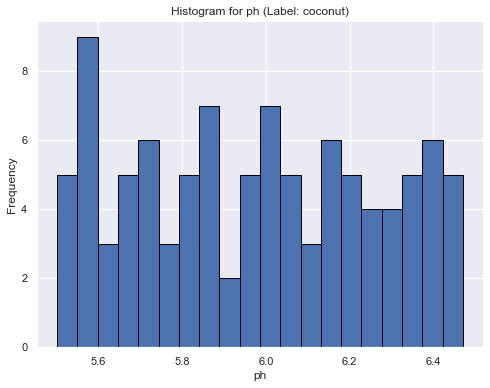

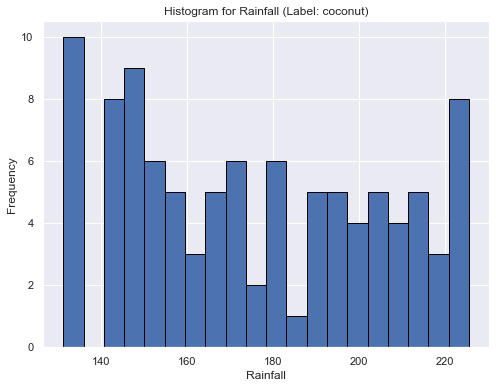

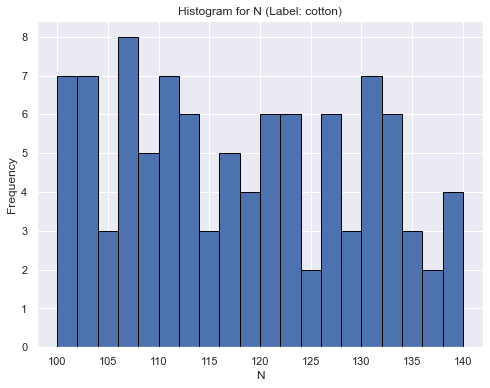

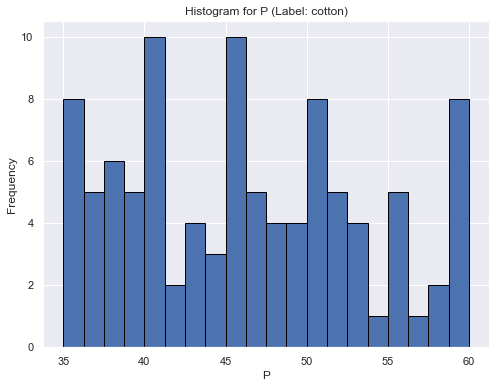

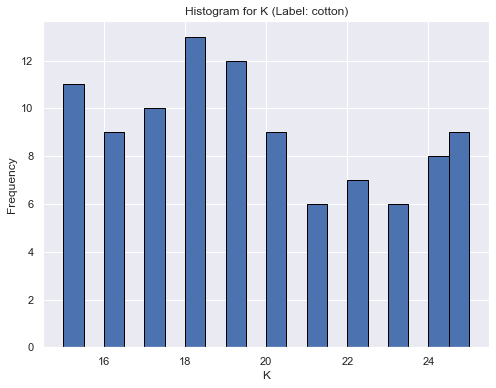

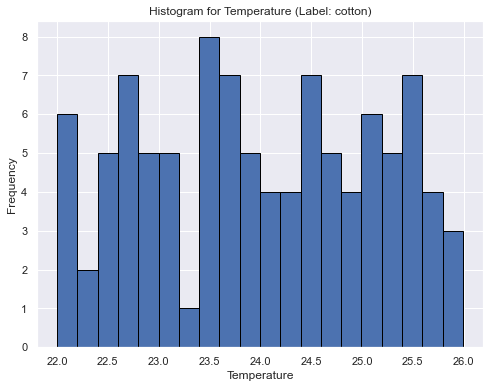

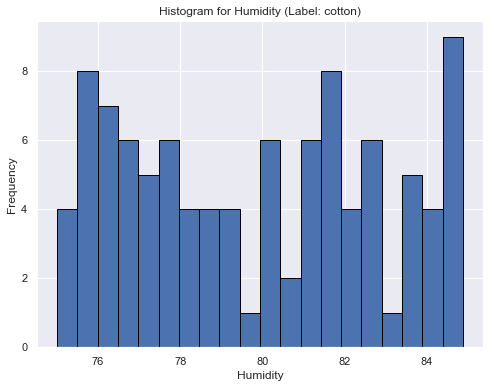

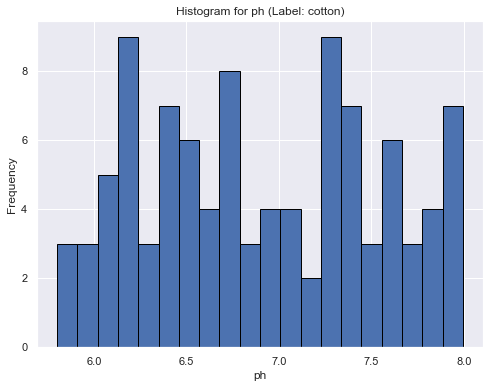

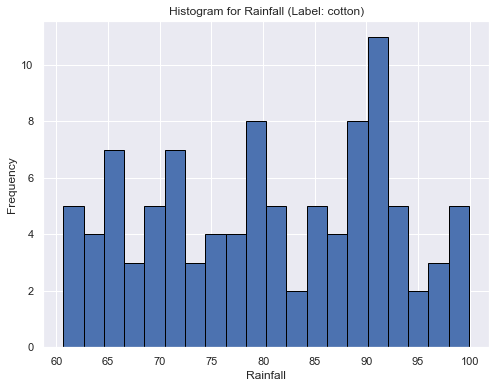

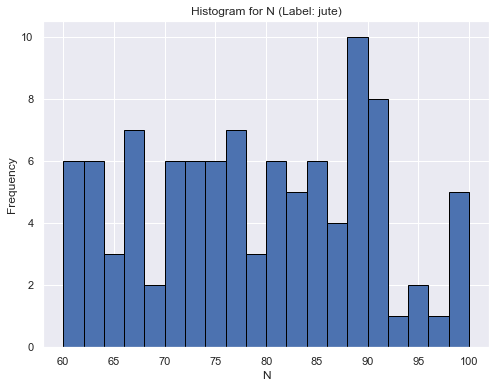

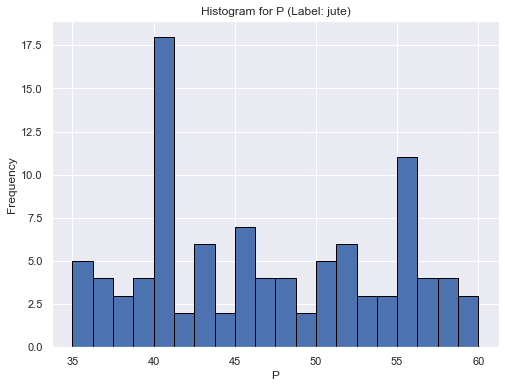

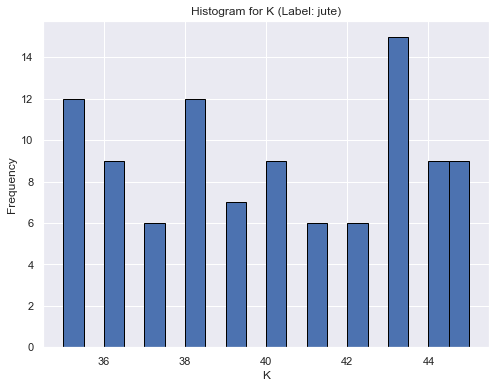

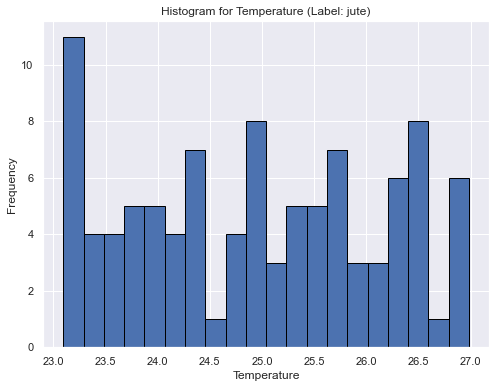

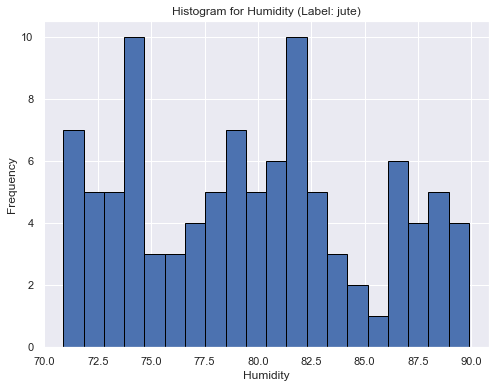

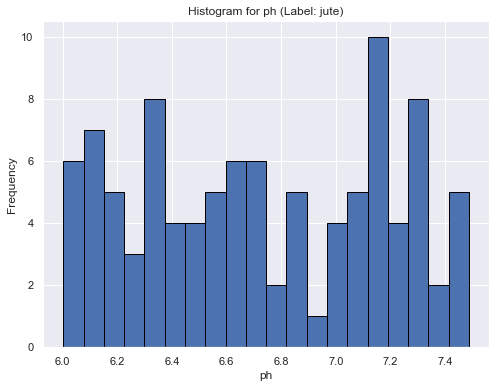

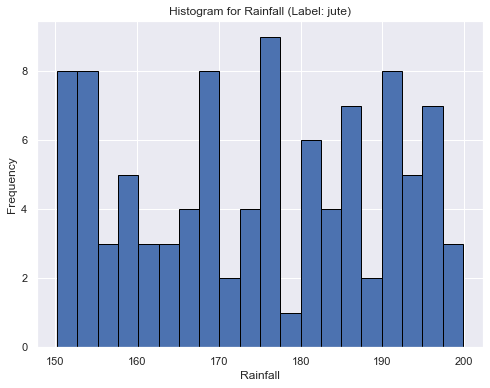

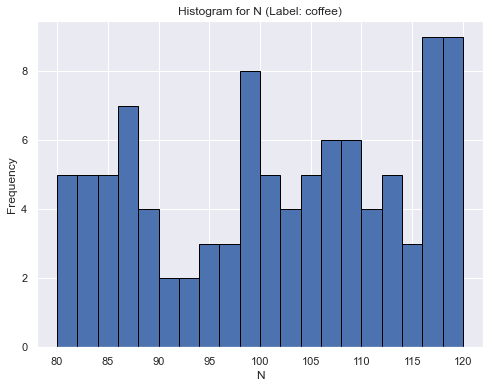

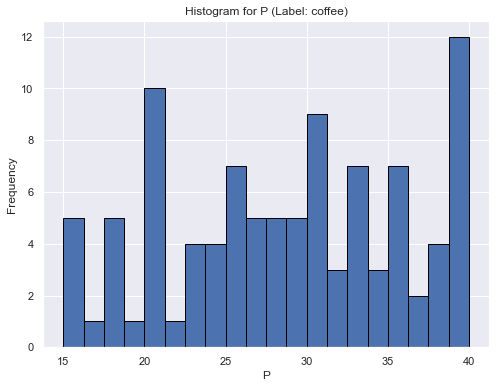

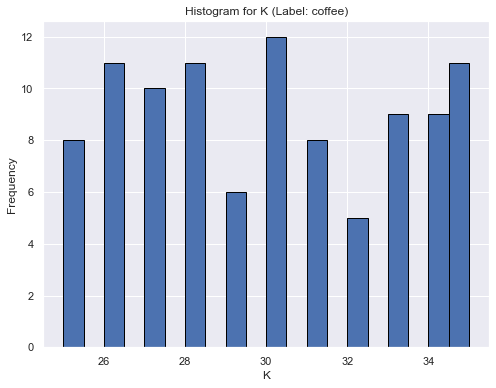

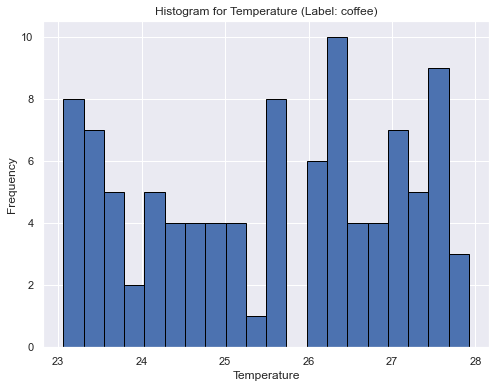

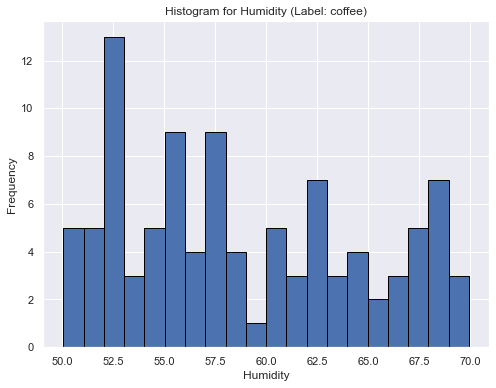

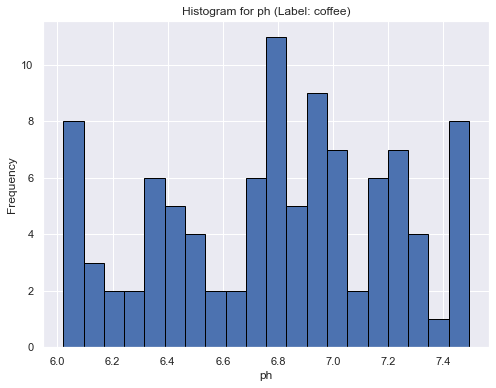

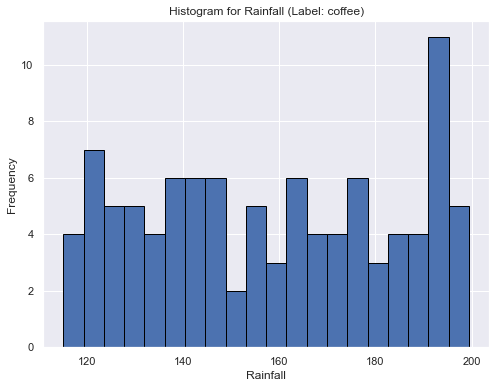

In [30]:
for label_value in df['label'].unique():
    subset_data = df[df['label'] == label_value]
    
    # Create a bar plot for each column
    for column in columns_to_plot:
        plot.figure(figsize=(8, 6))
        plot.hist(subset_data[column], bins=20, edgecolor='black')
        plot.xlabel(column)
        plot.ylabel('Frequency')
        plot.title(f'Histogram for {column} (Label: {label_value})')
        plot.show()

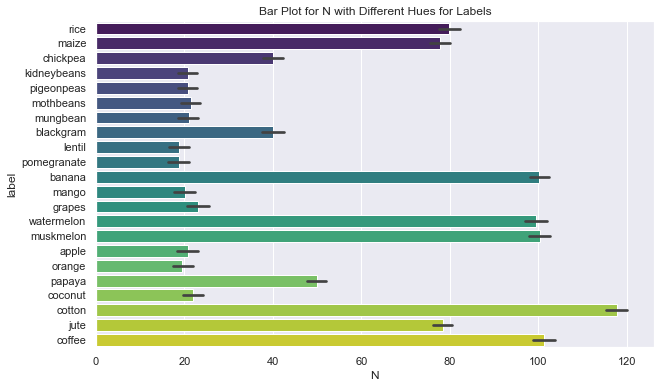

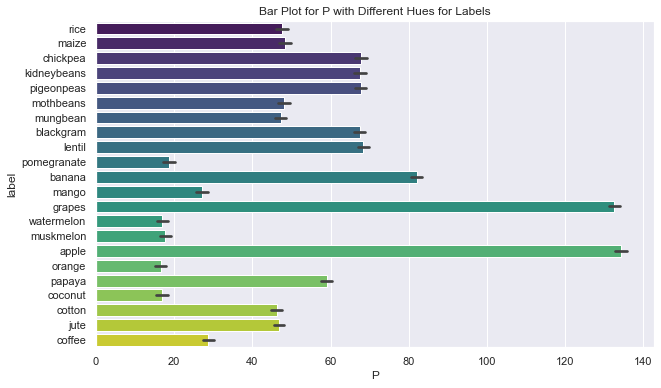

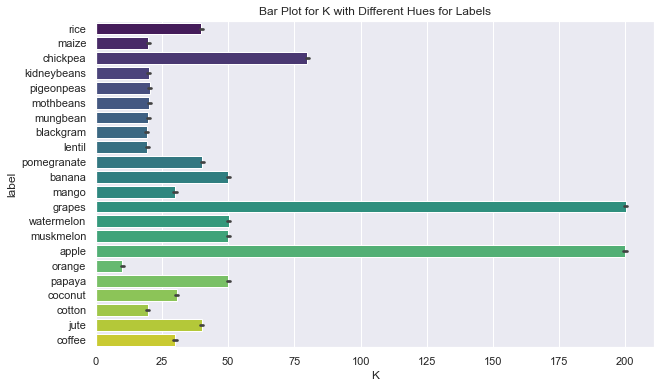

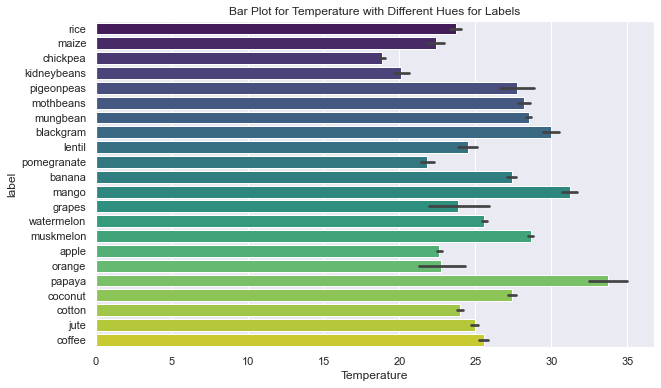

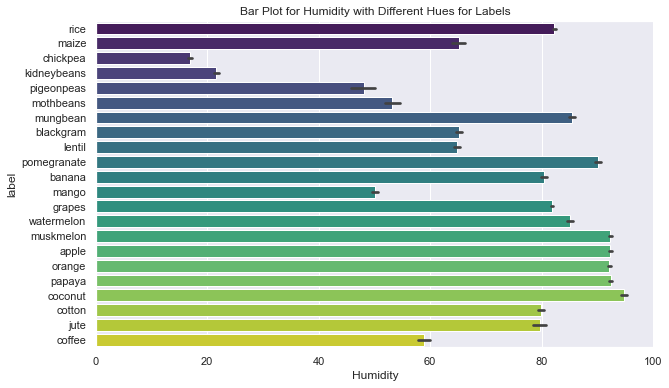

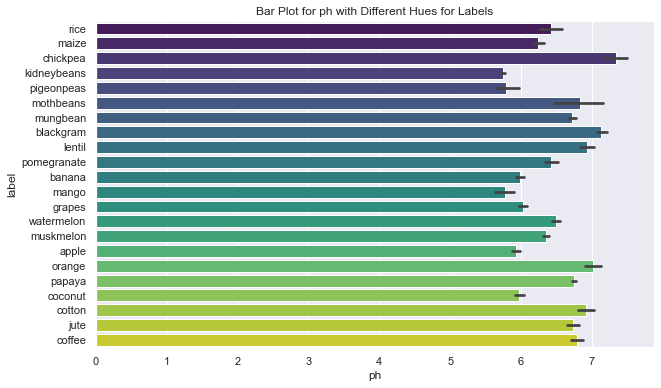

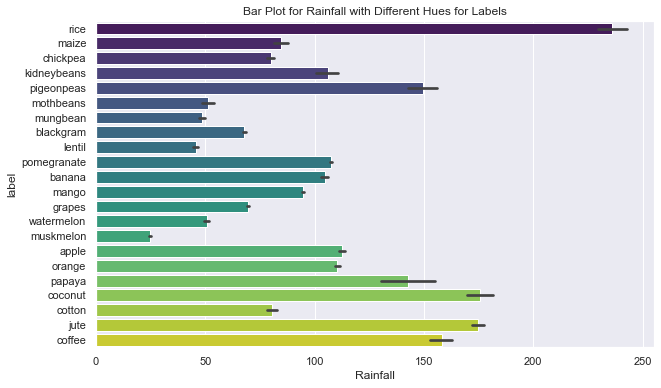

In [40]:
for column in columns_to_plot:
    plot.figure(figsize=(10, 6))
    sns.barplot(x=column, y='label', data=df, palette='viridis')
    plot.title(f'Bar Plot for {column} with Different Hues for Labels')
    plot.show()

In [48]:
df.corr()

N         P         K  Temperature  Humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
Temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
Humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
Rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             Rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
Temperature -0.030084  
Humidity     0.094423  
ph          -0.109069  
Rainfall     1.000000

Text(0.5, 1.0, 'Correlation Matrix')

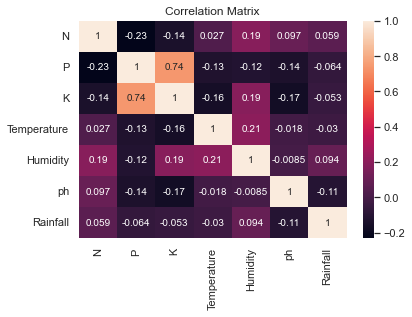

In [50]:
sns.heatmap(df.corr(), annot =True)
plot.title('Correlation Matrix')

Insights



Nitrogen

High requirement - Rice, Maize, Watermelon, muskmelon, banana, cofee

low requiement - lentils, pomegrantes, apples


Phosphorous

High requirement - grapes, apple, banana

low requirement - watermelon, muskmelon, orange, coconut, pomegrante


Potassuim

High requirement - grapes, apple, chickpea

low requirement - lentils, maize, oranges, beans


Temperature

High requirement - papaya, mango, blackgram

low requirement - chickpea, pomogrante, apple


Humidity

High requirement - coconut, apple, rice, pomogranate

low requirement - chickpea, kidneybeans


ph

High requirement - chickpea, blackgram, orange

low requirement - kidneybeans, mango, pigeonpeas


Rainfall

High requirement - rice, coconut, jute

low requirement - muskmelon, lentil, watermelon